In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import wasserstein_distance
import glob
import os
import xarray as xr
from matplotlib.pyplot import figure
import skill_metrics as sm
plt.close('all')

Reading in data: for each dataset (ERA-5, WRF, MERRA-2, Lidar), I follow the same steps:
1. read in the file to a dataframe
2. create an array of zeros and fill it with values for each height
3. create an array of zeros for each season and fill it with values for each height
4. create dataframes that show the mean and standard deviation for diurnal cycle overall and during each season 

In [2]:
# Gordon ERA5

# read in file
GordonERAdf=pd.read_csv('/projects/sebu3651/ProjectResearch/GordonsRidge/GordonsRidgeERA5/GordonsRidgeERA')
GordonERAdf.set_index('time', inplace=True)

# filter dataframe to match observational period
GordonERAdf=GordonERAdf[(GordonERAdf.index >='2016-02-01 00:00:00')&(GordonERAdf.index<='2017-01-31 23:00:00')]

# create array of zeros and fill with wind speed data for each height
GordonERAWS=np.zeros((8784,11))
GordonERAWS[:,10]=GordonERAdf[GordonERAdf.height==10]['wind speed']
GordonERAWS[:,9]=GordonERAdf[GordonERAdf.height==31]['wind speed']
GordonERAWS[:,8]=GordonERAdf[GordonERAdf.height==54]['wind speed']
GordonERAWS[:,7]=GordonERAdf[GordonERAdf.height==79]['wind speed']
GordonERAWS[:,6]=GordonERAdf[GordonERAdf.height==106]['wind speed']
GordonERAWS[:,5]=GordonERAdf[GordonERAdf.height==137]['wind speed']
GordonERAWS[:,4]=GordonERAdf[GordonERAdf.height==170]['wind speed']
GordonERAWS[:,3]=GordonERAdf[GordonERAdf.height==205]['wind speed']
GordonERAWS[:,2]=GordonERAdf[GordonERAdf.height==245]['wind speed']
GordonERAWS[:,1]=GordonERAdf[GordonERAdf.height==288]['wind speed']
GordonERAWS[:,0]=GordonERAdf[GordonERAdf.height==334]['wind speed']

# list of z values for ERA-5 heights
GordonERAZ=[334, 288, 245, 205, 170, 137, 106, 79, 54, 31, 10]

In [3]:
# creating winter ERA5 array
GordonERADJFdf=GordonERAdf[(GordonERAdf.index.str.contains('-12-'))|(GordonERAdf.index.str.contains('-01-'))|(GordonERAdf.index.str.contains('-02-'))]
GordonERAWSDJF=np.zeros((2184,11))
GordonERAWSDJF[:,10]=GordonERADJFdf[GordonERADJFdf.height==10]['wind speed']
GordonERAWSDJF[:,9]=GordonERADJFdf[GordonERADJFdf.height==31]['wind speed']
GordonERAWSDJF[:,8]=GordonERADJFdf[GordonERADJFdf.height==54]['wind speed']
GordonERAWSDJF[:,7]=GordonERADJFdf[GordonERADJFdf.height==79]['wind speed']
GordonERAWSDJF[:,6]=GordonERADJFdf[GordonERADJFdf.height==106]['wind speed']
GordonERAWSDJF[:,5]=GordonERADJFdf[GordonERADJFdf.height==137]['wind speed']
GordonERAWSDJF[:,4]=GordonERADJFdf[GordonERADJFdf.height==170]['wind speed']
GordonERAWSDJF[:,3]=GordonERADJFdf[GordonERADJFdf.height==205]['wind speed']
GordonERAWSDJF[:,2]=GordonERADJFdf[GordonERADJFdf.height==245]['wind speed']
GordonERAWSDJF[:,1]=GordonERADJFdf[GordonERADJFdf.height==288]['wind speed']
GordonERAWSDJF[:,0]=GordonERADJFdf[GordonERADJFdf.height==334]['wind speed']

# creating spring ERA5 array
GordonERAMAMdf=GordonERAdf[(GordonERAdf.index.str.contains('-03-'))|(GordonERAdf.index.str.contains('-04-'))|(GordonERAdf.index.str.contains('-05-'))]
GordonERAWSMAM=np.zeros((2208,11))
GordonERAWSMAM[:,10]=GordonERAMAMdf[GordonERAMAMdf.height==10]['wind speed']
GordonERAWSMAM[:,9]=GordonERAMAMdf[GordonERAMAMdf.height==31]['wind speed']
GordonERAWSMAM[:,8]=GordonERAMAMdf[GordonERAMAMdf.height==54]['wind speed']
GordonERAWSMAM[:,7]=GordonERAMAMdf[GordonERAMAMdf.height==79]['wind speed']
GordonERAWSMAM[:,6]=GordonERAMAMdf[GordonERAMAMdf.height==106]['wind speed']
GordonERAWSMAM[:,5]=GordonERAMAMdf[GordonERAMAMdf.height==137]['wind speed']
GordonERAWSMAM[:,4]=GordonERAMAMdf[GordonERAMAMdf.height==170]['wind speed']
GordonERAWSMAM[:,3]=GordonERAMAMdf[GordonERAMAMdf.height==205]['wind speed']
GordonERAWSMAM[:,2]=GordonERAMAMdf[GordonERAMAMdf.height==245]['wind speed']
GordonERAWSMAM[:,1]=GordonERAMAMdf[GordonERAMAMdf.height==288]['wind speed']
GordonERAWSMAM[:,0]=GordonERAMAMdf[GordonERAMAMdf.height==334]['wind speed']

# creating summer ERA5 array
GordonERAJJAdf=GordonERAdf[(GordonERAdf.index.str.contains('-06-'))|(GordonERAdf.index.str.contains('-07-'))|(GordonERAdf.index.str.contains('-08-'))]
GordonERAWSJJA=np.zeros((2208,11))
GordonERAWSJJA[:,10]=GordonERAJJAdf[GordonERAJJAdf.height==10]['wind speed']
GordonERAWSJJA[:,9]=GordonERAJJAdf[GordonERAJJAdf.height==31]['wind speed']
GordonERAWSJJA[:,8]=GordonERAJJAdf[GordonERAJJAdf.height==54]['wind speed']
GordonERAWSJJA[:,7]=GordonERAJJAdf[GordonERAJJAdf.height==79]['wind speed']
GordonERAWSJJA[:,6]=GordonERAJJAdf[GordonERAJJAdf.height==106]['wind speed']
GordonERAWSJJA[:,5]=GordonERAJJAdf[GordonERAJJAdf.height==137]['wind speed']
GordonERAWSJJA[:,4]=GordonERAJJAdf[GordonERAJJAdf.height==170]['wind speed']
GordonERAWSJJA[:,3]=GordonERAJJAdf[GordonERAJJAdf.height==205]['wind speed']
GordonERAWSJJA[:,2]=GordonERAJJAdf[GordonERAJJAdf.height==245]['wind speed']
GordonERAWSJJA[:,1]=GordonERAJJAdf[GordonERAJJAdf.height==288]['wind speed']
GordonERAWSJJA[:,0]=GordonERAJJAdf[GordonERAJJAdf.height==334]['wind speed']

# creating fall ERA5 array
GordonERASONdf=GordonERAdf[(GordonERAdf.index.str.contains('-09-'))|(GordonERAdf.index.str.contains('-10-'))|(GordonERAdf.index.str.contains('-11-'))]
GordonERAWSSON=np.zeros((2184,11))
GordonERAWSSON[:,10]=GordonERASONdf[GordonERASONdf.height==10]['wind speed']
GordonERAWSSON[:,9]=GordonERASONdf[GordonERASONdf.height==31]['wind speed']
GordonERAWSSON[:,8]=GordonERASONdf[GordonERASONdf.height==54]['wind speed']
GordonERAWSSON[:,7]=GordonERASONdf[GordonERASONdf.height==79]['wind speed']
GordonERAWSSON[:,6]=GordonERASONdf[GordonERASONdf.height==106]['wind speed']
GordonERAWSSON[:,5]=GordonERASONdf[GordonERASONdf.height==137]['wind speed']
GordonERAWSSON[:,4]=GordonERASONdf[GordonERASONdf.height==170]['wind speed']
GordonERAWSSON[:,3]=GordonERASONdf[GordonERASONdf.height==205]['wind speed']
GordonERAWSSON[:,2]=GordonERASONdf[GordonERASONdf.height==245]['wind speed']
GordonERAWSSON[:,1]=GordonERASONdf[GordonERASONdf.height==288]['wind speed']
GordonERAWSSON[:,0]=GordonERASONdf[GordonERASONdf.height==334]['wind speed']

In [4]:
# creating dataframe for overall ERA diurnal cycle using height of 106 
GordonERAdiurnal=GordonERAdf[GordonERAdf.height==106][['wind speed']].copy()
GordonERAdiurnal.index=pd.to_datetime(GordonERAdiurnal.index)
GordonERAdiurnal=GordonERAdiurnal.groupby(GordonERAdiurnal.index.hour).mean()

GordonERAdiurnalStd=GordonERAdf[GordonERAdf.height==106][['wind speed']].copy()
GordonERAdiurnalStd.index=pd.to_datetime(GordonERAdiurnalStd.index)
GordonERAdiurnalStd=GordonERAdiurnalStd.groupby(GordonERAdiurnalStd.index.hour).std()

# creating dataframes for winter diurnal cycle
GordonERADJFdiurnal=GordonERADJFdf[GordonERADJFdf.height==106][['wind speed']].copy()
GordonERADJFdiurnal.index=pd.to_datetime(GordonERADJFdiurnal.index)
GordonERADJFdiurnal=GordonERADJFdiurnal.groupby(GordonERADJFdiurnal.index.hour).mean()

GordonERADJFdiurnalStd=GordonERADJFdf[GordonERADJFdf.height==106][['wind speed']].copy()
GordonERADJFdiurnalStd.index=pd.to_datetime(GordonERADJFdiurnalStd.index)
GordonERADJFdiurnalStd=GordonERADJFdiurnalStd.groupby(GordonERADJFdiurnalStd.index.hour).std()

# creating dataframes for spring diurnal cycle
GordonERAMAMdiurnal=GordonERAMAMdf[GordonERAMAMdf.height==106][['wind speed']].copy()
GordonERAMAMdiurnal.index=pd.to_datetime(GordonERAMAMdiurnal.index)
GordonERAMAMdiurnal=GordonERAMAMdiurnal.groupby(GordonERAMAMdiurnal.index.hour).mean()

GordonERAMAMdiurnalStd=GordonERAMAMdf[GordonERAMAMdf.height==106][['wind speed']].copy()
GordonERAMAMdiurnalStd.index=pd.to_datetime(GordonERAMAMdiurnalStd.index)
GordonERAMAMdiurnalStd=GordonERAMAMdiurnalStd.groupby(GordonERAMAMdiurnalStd.index.hour).std()

# creating dataframes for summer diurnal cycle
GordonERAJJAdiurnal=GordonERAJJAdf[GordonERAJJAdf.height==106][['wind speed']].copy()
GordonERAJJAdiurnal.index=pd.to_datetime(GordonERAJJAdiurnal.index)
GordonERAJJAdiurnal=GordonERAJJAdiurnal.groupby(GordonERAJJAdiurnal.index.hour).mean()

GordonERAJJAdiurnalStd=GordonERAJJAdf[GordonERAJJAdf.height==106][['wind speed']].copy()
GordonERAJJAdiurnalStd.index=pd.to_datetime(GordonERAJJAdiurnalStd.index)
GordonERAJJAdiurnalStd=GordonERAJJAdiurnalStd.groupby(GordonERAJJAdiurnalStd.index.hour).std()

# creating dataframes for fall diurnal cycle
GordonERASONdiurnal=GordonERASONdf[GordonERASONdf.height==106][['wind speed']].copy()
GordonERASONdiurnal.index=pd.to_datetime(GordonERASONdiurnal.index)
GordonERASONdiurnal=GordonERASONdiurnal.groupby(GordonERASONdiurnal.index.hour).mean()

GordonERASONdiurnalStd=GordonERASONdf[GordonERASONdf.height==106][['wind speed']].copy()
GordonERASONdiurnalStd.index=pd.to_datetime(GordonERASONdiurnalStd.index)
GordonERASONdiurnalStd=GordonERASONdiurnalStd.groupby(GordonERASONdiurnalStd.index.hour).std()

In [5]:
# Gordon WRF

# reading in WRF data
GordonWRFdf=pd.read_csv('/projects/sebu3651/ProjectResearch/GordonsRidge/GordonsRidgeWRF/GordonsRidgeWRF')
GordonWRFdf.set_index('time',inplace=True)

# filtering WRF data to match observational period
GordonWRFdf=GordonWRFdf[(GordonWRFdf.index >='2016-02-01 00:00:00')&(GordonWRFdf.index<='2017-02-01 00:00:00') ]

# create array of zeros and fill for each WRF height
GordonWRFWS=np.zeros((8784,8))
GordonWRFWS[:,0]=GordonWRFdf['windspeed_60m']
GordonWRFWS[:,1]=GordonWRFdf['windspeed_80m']
GordonWRFWS[:,2]=GordonWRFdf['windspeed_100m']
GordonWRFWS[:,3]=GordonWRFdf['windspeed_120m']
GordonWRFWS[:,4]=GordonWRFdf['windspeed_140m']
GordonWRFWS[:,5]=GordonWRFdf['windspeed_160m']
GordonWRFWS[:,6]=GordonWRFdf['windspeed_180m']
GordonWRFWS[:,7]=GordonWRFdf['windspeed_200m']

# z values for WRF heights
GordonWRFZ=[60.,80.,100.,120.,140.,160.,180.,200.]

In [6]:
# creating winter WRF array
GordonWRFDJFdf=GordonWRFdf[(GordonWRFdf.index.str.contains('-12-'))|(GordonWRFdf.index.str.contains('-01-'))|(GordonWRFdf.index.str.contains('-02-'))]
GordonWRFWSDJF=np.zeros((2184,8))
GordonWRFWSDJF[:,0]=GordonWRFDJFdf['windspeed_60m']
GordonWRFWSDJF[:,1]=GordonWRFDJFdf['windspeed_80m']
GordonWRFWSDJF[:,2]=GordonWRFDJFdf['windspeed_100m']
GordonWRFWSDJF[:,3]=GordonWRFDJFdf['windspeed_120m']
GordonWRFWSDJF[:,4]=GordonWRFDJFdf['windspeed_140m']
GordonWRFWSDJF[:,5]=GordonWRFDJFdf['windspeed_160m']
GordonWRFWSDJF[:,6]=GordonWRFDJFdf['windspeed_180m']
GordonWRFWSDJF[:,7]=GordonWRFDJFdf['windspeed_200m']

# creating spring WRF array
GordonWRFMAMdf=GordonWRFdf[(GordonWRFdf.index.str.contains('-03-'))|(GordonWRFdf.index.str.contains('-04-'))|(GordonWRFdf.index.str.contains('-05-'))]
GordonWRFWSMAM=np.zeros((2208,8))
GordonWRFWSMAM[:,0]=GordonWRFMAMdf['windspeed_60m']
GordonWRFWSMAM[:,1]=GordonWRFMAMdf['windspeed_80m']
GordonWRFWSMAM[:,2]=GordonWRFMAMdf['windspeed_100m']
GordonWRFWSMAM[:,3]=GordonWRFMAMdf['windspeed_120m']
GordonWRFWSMAM[:,4]=GordonWRFMAMdf['windspeed_140m']
GordonWRFWSMAM[:,5]=GordonWRFMAMdf['windspeed_160m']
GordonWRFWSMAM[:,6]=GordonWRFMAMdf['windspeed_180m']
GordonWRFWSMAM[:,7]=GordonWRFMAMdf['windspeed_200m']

# creating summer WRF array
GordonWRFJJAdf=GordonWRFdf[(GordonWRFdf.index.str.contains('-06-'))|(GordonWRFdf.index.str.contains('-07-'))|(GordonWRFdf.index.str.contains('-08-'))]
GordonWRFWSJJA=np.zeros((2208,8))
GordonWRFWSJJA[:,0]=GordonWRFJJAdf['windspeed_60m']
GordonWRFWSJJA[:,1]=GordonWRFJJAdf['windspeed_80m']
GordonWRFWSJJA[:,2]=GordonWRFJJAdf['windspeed_100m']
GordonWRFWSJJA[:,3]=GordonWRFJJAdf['windspeed_120m']
GordonWRFWSJJA[:,4]=GordonWRFJJAdf['windspeed_140m']
GordonWRFWSJJA[:,5]=GordonWRFJJAdf['windspeed_160m']
GordonWRFWSJJA[:,6]=GordonWRFJJAdf['windspeed_180m']
GordonWRFWSJJA[:,7]=GordonWRFJJAdf['windspeed_200m']

# creating fall WRF array
GordonWRFSONdf=GordonWRFdf[(GordonWRFdf.index.str.contains('-09-'))|(GordonWRFdf.index.str.contains('-10-'))|(GordonWRFdf.index.str.contains('-11-'))]
GordonWRFWSSON=np.zeros((2184,8))
GordonWRFWSSON[:,0]=GordonWRFSONdf['windspeed_60m']
GordonWRFWSSON[:,1]=GordonWRFSONdf['windspeed_80m']
GordonWRFWSSON[:,2]=GordonWRFSONdf['windspeed_100m']
GordonWRFWSSON[:,3]=GordonWRFSONdf['windspeed_120m']
GordonWRFWSSON[:,4]=GordonWRFSONdf['windspeed_140m']
GordonWRFWSSON[:,5]=GordonWRFSONdf['windspeed_160m']
GordonWRFWSSON[:,6]=GordonWRFSONdf['windspeed_180m']
GordonWRFWSSON[:,7]=GordonWRFSONdf['windspeed_200m']

In [7]:
# creating dataframe of overall WRF diurnal cycle using height of 100
GordonWRFdiurnal=GordonWRFdf[['windspeed_100m']].copy()
GordonWRFdiurnal.index=pd.to_datetime(GordonWRFdiurnal.index)
GordonWRFdiurnal=GordonWRFdiurnal.groupby(GordonWRFdiurnal.index.hour).mean()

GordonWRFdiurnalStd=GordonWRFdf[['windspeed_100m']].copy()
GordonWRFdiurnalStd.index=pd.to_datetime(GordonWRFdiurnalStd.index)
GordonWRFdiurnalStd=GordonWRFdiurnalStd.groupby(GordonWRFdiurnalStd.index.hour).std()

# creating dataframes for winter diurnal cycle
GordonWRFDJFdiurnal=GordonWRFDJFdf[['windspeed_100m']].copy()
GordonWRFDJFdiurnal.index=pd.to_datetime(GordonWRFDJFdiurnal.index)
GordonWRFDJFdiurnal=GordonWRFDJFdiurnal.groupby(GordonWRFDJFdiurnal.index.hour).mean()

GordonWRFDJFdiurnalStd=GordonWRFDJFdf[['windspeed_100m']].copy()
GordonWRFDJFdiurnalStd.index=pd.to_datetime(GordonWRFDJFdiurnalStd.index)
GordonWRFDJFdiurnalStd=GordonWRFDJFdiurnalStd.groupby(GordonWRFDJFdiurnalStd.index.hour).std()

# creating dataframes for spring diurnal cycle
GordonWRFMAMdiurnal=GordonWRFMAMdf[['windspeed_100m']].copy()
GordonWRFMAMdiurnal.index=pd.to_datetime(GordonWRFMAMdiurnal.index)
GordonWRFMAMdiurnal=GordonWRFMAMdiurnal.groupby(GordonWRFMAMdiurnal.index.hour).mean()

GordonWRFMAMdiurnalStd=GordonWRFMAMdf[['windspeed_100m']].copy()
GordonWRFMAMdiurnalStd.index=pd.to_datetime(GordonWRFMAMdiurnalStd.index)
GordonWRFMAMdiurnalStd=GordonWRFMAMdiurnalStd.groupby(GordonWRFMAMdiurnalStd.index.hour).std()

# creating dataframes for summer diurnal cycle
GordonWRFJJAdiurnal=GordonWRFJJAdf[['windspeed_100m']].copy()
GordonWRFJJAdiurnal.index=pd.to_datetime(GordonWRFJJAdiurnal.index)
GordonWRFJJAdiurnal=GordonWRFJJAdiurnal.groupby(GordonWRFJJAdiurnal.index.hour).mean()

GordonWRFJJAdiurnalStd=GordonWRFJJAdf[['windspeed_100m']].copy()
GordonWRFJJAdiurnalStd.index=pd.to_datetime(GordonWRFJJAdiurnalStd.index)
GordonWRFJJAdiurnalStd=GordonWRFJJAdiurnalStd.groupby(GordonWRFJJAdiurnalStd.index.hour).std()

# creating dataframes for fall diurnal cycle
GordonWRFSONdiurnal=GordonWRFSONdf[['windspeed_100m']].copy()
GordonWRFSONdiurnal.index=pd.to_datetime(GordonWRFSONdiurnal.index)
GordonWRFSONdiurnal=GordonWRFSONdiurnal.groupby(GordonWRFSONdiurnal.index.hour).mean()

GordonWRFSONdiurnalStd=GordonWRFSONdf[['windspeed_100m']].copy()
GordonWRFSONdiurnalStd.index=pd.to_datetime(GordonWRFSONdiurnalStd.index)
GordonWRFSONdiurnalStd=GordonWRFSONdiurnalStd.groupby(GordonWRFSONdiurnalStd.index.hour).std()

In [8]:
# Gordon MERRA2

# reading in MERRA2 data
GordonMERRAdf=pd.read_csv('/projects/sebu3651/ProjectResearch/GordonsRidge/GordonsRidgeMERRA2/GordonsRidgeMERRA2')
GordonMERRAdf.set_index('time',inplace=True)

# filtering MERRA2 data to match observational period 
GordonMERRAdf=GordonMERRAdf[(GordonMERRAdf.index >='2016-01-31 23:00:00')&(GordonMERRAdf.index<='2017-01-31 23:00:00') ]

# create array of zeros and fill for each MERRA2 height
GordonMERRAWS=np.zeros((8784,6))
GordonMERRAWS[:,0]=GordonMERRAdf['40m wind speed']
GordonMERRAWS[:,1]=GordonMERRAdf['60m wind speed']
GordonMERRAWS[:,2]=GordonMERRAdf['80m wind speed']
GordonMERRAWS[:,3]=GordonMERRAdf['100m wind speed']
GordonMERRAWS[:,4]=GordonMERRAdf['120m wind speed']
GordonMERRAWS[:,5]=GordonMERRAdf['140m wind speed']

# list of z values for MERRA-2 heights
GordonMERRAZ=[40,60,80,100,120,140]

In [9]:
# creating winter MERRA2 array
GordonMERRADJFdf=GordonMERRAdf[(GordonMERRAdf.index.str.contains('-12-'))|(GordonMERRAdf.index.str.contains('-01-'))|(GordonMERRAdf.index.str.contains('-02-'))]
GordonMERRAWSDJF=np.zeros((2184,6))
GordonMERRAWSDJF[:,0]=GordonMERRADJFdf['40m wind speed']
GordonMERRAWSDJF[:,1]=GordonMERRADJFdf['60m wind speed']
GordonMERRAWSDJF[:,2]=GordonMERRADJFdf['80m wind speed']
GordonMERRAWSDJF[:,3]=GordonMERRADJFdf['100m wind speed']
GordonMERRAWSDJF[:,4]=GordonMERRADJFdf['120m wind speed']
GordonMERRAWSDJF[:,5]=GordonMERRADJFdf['140m wind speed']

# creating spring MERRA2 array
GordonMERRAMAMdf=GordonMERRAdf[(GordonMERRAdf.index.str.contains('-03-'))|(GordonMERRAdf.index.str.contains('-04-'))|(GordonMERRAdf.index.str.contains('-05-'))]
GordonMERRAWSMAM=np.zeros((2208,6))
GordonMERRAWSMAM[:,0]=GordonMERRAMAMdf['40m wind speed']
GordonMERRAWSMAM[:,1]=GordonMERRAMAMdf['60m wind speed']
GordonMERRAWSMAM[:,2]=GordonMERRAMAMdf['80m wind speed']
GordonMERRAWSMAM[:,3]=GordonMERRAMAMdf['100m wind speed']
GordonMERRAWSMAM[:,4]=GordonMERRAMAMdf['120m wind speed']
GordonMERRAWSMAM[:,5]=GordonMERRAMAMdf['140m wind speed']

# creating summer MERRA2 array
GordonMERRAJJAdf=GordonMERRAdf[(GordonMERRAdf.index.str.contains('-06-'))|(GordonMERRAdf.index.str.contains('-07-'))|(GordonMERRAdf.index.str.contains('-08-'))]
GordonMERRAWSJJA=np.zeros((2208,6))
GordonMERRAWSJJA[:,0]=GordonMERRAJJAdf['40m wind speed']
GordonMERRAWSJJA[:,1]=GordonMERRAJJAdf['60m wind speed']
GordonMERRAWSJJA[:,2]=GordonMERRAJJAdf['80m wind speed']
GordonMERRAWSJJA[:,3]=GordonMERRAJJAdf['100m wind speed']
GordonMERRAWSJJA[:,4]=GordonMERRAJJAdf['120m wind speed']
GordonMERRAWSJJA[:,5]=GordonMERRAJJAdf['140m wind speed']

# creating fall MERRA2 array
GordonMERRASONdf=GordonMERRAdf[(GordonMERRAdf.index.str.contains('-09-'))|(GordonMERRAdf.index.str.contains('-10-'))|(GordonMERRAdf.index.str.contains('-11-'))]
GordonMERRAWSSON=np.zeros((2184,6))
GordonMERRAWSSON[:,0]=GordonMERRASONdf['40m wind speed']
GordonMERRAWSSON[:,1]=GordonMERRASONdf['60m wind speed']
GordonMERRAWSSON[:,2]=GordonMERRASONdf['80m wind speed']
GordonMERRAWSSON[:,3]=GordonMERRASONdf['100m wind speed']
GordonMERRAWSSON[:,4]=GordonMERRASONdf['120m wind speed']
GordonMERRAWSSON[:,5]=GordonMERRASONdf['140m wind speed']

In [10]:
# creating dataframe of overall MERRA2 diurnal cycle using height of 100
GordonMERRAdiurnal=GordonMERRAdf[['100m wind speed']].copy()
GordonMERRAdiurnal.index=pd.to_datetime(GordonMERRAdiurnal.index)
GordonMERRAdiurnal=GordonMERRAdiurnal.groupby(GordonMERRAdiurnal.index.hour).mean()

GordonMERRAdiurnalStd=GordonMERRAdf[['100m wind speed']].copy()
GordonMERRAdiurnalStd.index=pd.to_datetime(GordonMERRAdiurnalStd.index)
GordonMERRAdiurnalStd=GordonMERRAdiurnalStd.groupby(GordonMERRAdiurnalStd.index.hour).std()

# creating dataframes for winter diurnal cycle
GordonMERRADJFdiurnal=GordonMERRADJFdf[['100m wind speed']].copy()
GordonMERRADJFdiurnal.index=pd.to_datetime(GordonMERRADJFdiurnal.index)
GordonMERRADJFdiurnal=GordonMERRADJFdiurnal.groupby(GordonMERRADJFdiurnal.index.hour).mean()

GordonMERRADJFdiurnalStd=GordonMERRADJFdf[['100m wind speed']].copy()
GordonMERRADJFdiurnalStd.index=pd.to_datetime(GordonMERRADJFdiurnalStd.index)
GordonMERRADJFdiurnalStd=GordonMERRADJFdiurnalStd.groupby(GordonMERRADJFdiurnalStd.index.hour).std()

# creating dataframes for spring diurnal cycle
GordonMERRAMAMdiurnal=GordonMERRAMAMdf[['100m wind speed']].copy()
GordonMERRAMAMdiurnal.index=pd.to_datetime(GordonMERRAMAMdiurnal.index)
GordonMERRAMAMdiurnal=GordonMERRAMAMdiurnal.groupby(GordonMERRAMAMdiurnal.index.hour).mean()

GordonMERRAMAMdiurnalStd=GordonMERRAMAMdf[['100m wind speed']].copy()
GordonMERRAMAMdiurnalStd.index=pd.to_datetime(GordonMERRAMAMdiurnalStd.index)
GordonMERRAMAMdiurnalStd=GordonMERRAMAMdiurnalStd.groupby(GordonMERRAMAMdiurnalStd.index.hour).std()

# creating dataframes for summer diurnal cycle
GordonMERRAJJAdiurnal=GordonMERRAJJAdf[['100m wind speed']].copy()
GordonMERRAJJAdiurnal.index=pd.to_datetime(GordonMERRAJJAdiurnal.index)
GordonMERRAJJAdiurnal=GordonMERRAJJAdiurnal.groupby(GordonMERRAJJAdiurnal.index.hour).mean()

GordonMERRAJJAdiurnalStd=GordonMERRAJJAdf[['100m wind speed']].copy()
GordonMERRAJJAdiurnalStd.index=pd.to_datetime(GordonMERRAJJAdiurnalStd.index)
GordonMERRAJJAdiurnalStd=GordonMERRAJJAdiurnalStd.groupby(GordonMERRAJJAdiurnalStd.index.hour).std()

# creating dataframes for fall diurnal cycle
GordonMERRASONdiurnal=GordonMERRASONdf[['100m wind speed']].copy()
GordonMERRASONdiurnal.index=pd.to_datetime(GordonMERRASONdiurnal.index)
GordonMERRASONdiurnal=GordonMERRASONdiurnal.groupby(GordonMERRASONdiurnal.index.hour).mean()

GordonMERRASONdiurnalStd=GordonMERRASONdf[['100m wind speed']].copy()
GordonMERRASONdiurnalStd.index=pd.to_datetime(GordonMERRASONdiurnalStd.index)
GordonMERRASONdiurnalStd=GordonMERRASONdiurnalStd.groupby(GordonMERRASONdiurnalStd.index.hour).std()

In [11]:
# Gordon Lidar

# reading in data
GordonLidardf=pd.read_csv('/projects/sebu3651/ProjectResearch/GordonsRidge/GordonsRidgeLidar/GordonsRidgeLidarInterpolatedHourly')
GordonLidardf.set_index('Timestamp (end of interval)',inplace=True)

# filtering data to match desired observational period 
GordonLidardf=GordonLidardf[(GordonLidardf.index<='2017-01-31 23:00:00') & (GordonLidardf.index>='2016-02-01 00:00:00')]

# creating an array of zeros and filling for each observational height
GordonLidarWS=np.zeros((8784,9))
GordonLidarWS[:,0]=GordonLidardf['40m Wind Speed (m/s)'].values
GordonLidarWS[:,1]=GordonLidardf['60m Wind Speed (m/s)'].values
GordonLidarWS[:,2]=GordonLidardf['80m Wind Speed (m/s)'].values
GordonLidarWS[:,3]=GordonLidardf['100m Wind Speed (m/s)'].values
GordonLidarWS[:,4]=GordonLidardf['120m Wind Speed (m/s)'].values
GordonLidarWS[:,5]=GordonLidardf['140m Wind Speed (m/s)'].values
GordonLidarWS[:,6]=GordonLidardf['160m Wind Speed (m/s)'].values
GordonLidarWS[:,7]=GordonLidardf['180m Wind Speed (m/s)'].values
GordonLidarWS[:,8]=GordonLidardf['200m Wind Speed (m/s)'].values

# z values for lidar
GordonLidarZ=[40.,60.,80.,100.,120.,140.,160.,180.,200.]

In [12]:
# creating winter Lidar array
GordonLidarDJFdf=GordonLidardf[(GordonLidardf.index.str.contains('-12-'))|(GordonLidardf.index.str.contains('-01-'))|(GordonLidardf.index.str.contains('-02-'))]
GordonLidarWSDJF=np.zeros((2184,9))
GordonLidarWSDJF[:,0]=GordonLidarDJFdf['40m Wind Speed (m/s)'].values
GordonLidarWSDJF[:,1]=GordonLidarDJFdf['60m Wind Speed (m/s)'].values
GordonLidarWSDJF[:,2]=GordonLidarDJFdf['80m Wind Speed (m/s)'].values
GordonLidarWSDJF[:,3]=GordonLidarDJFdf['100m Wind Speed (m/s)'].values
GordonLidarWSDJF[:,4]=GordonLidarDJFdf['120m Wind Speed (m/s)'].values
GordonLidarWSDJF[:,5]=GordonLidarDJFdf['140m Wind Speed (m/s)'].values
GordonLidarWSDJF[:,6]=GordonLidarDJFdf['160m Wind Speed (m/s)'].values
GordonLidarWSDJF[:,7]=GordonLidarDJFdf['180m Wind Speed (m/s)'].values
GordonLidarWSDJF[:,8]=GordonLidarDJFdf['200m Wind Speed (m/s)'].values

# creating spring lidar array
GordonLidarMAMdf=GordonLidardf[(GordonLidardf.index.str.contains('-03-'))|(GordonLidardf.index.str.contains('-04-'))|(GordonLidardf.index.str.contains('-05-'))]
GordonLidarWSMAM=np.zeros((2208,9))
GordonLidarWSMAM[:,0]=GordonLidarMAMdf['40m Wind Speed (m/s)'].values
GordonLidarWSMAM[:,1]=GordonLidarMAMdf['60m Wind Speed (m/s)'].values
GordonLidarWSMAM[:,2]=GordonLidarMAMdf['80m Wind Speed (m/s)'].values
GordonLidarWSMAM[:,3]=GordonLidarMAMdf['100m Wind Speed (m/s)'].values
GordonLidarWSMAM[:,4]=GordonLidarMAMdf['120m Wind Speed (m/s)'].values
GordonLidarWSMAM[:,5]=GordonLidarMAMdf['140m Wind Speed (m/s)'].values
GordonLidarWSMAM[:,6]=GordonLidarMAMdf['160m Wind Speed (m/s)'].values
GordonLidarWSMAM[:,7]=GordonLidarMAMdf['180m Wind Speed (m/s)'].values
GordonLidarWSMAM[:,8]=GordonLidarMAMdf['200m Wind Speed (m/s)'].values

# creating summer lidar array
GordonLidarJJAdf=GordonLidardf[(GordonLidardf.index.str.contains('-06-'))|(GordonLidardf.index.str.contains('-07-'))|(GordonLidardf.index.str.contains('-08-'))]
GordonLidarWSJJA=np.zeros((2208,9))
GordonLidarWSJJA[:,0]=GordonLidarJJAdf['40m Wind Speed (m/s)'].values
GordonLidarWSJJA[:,1]=GordonLidarJJAdf['60m Wind Speed (m/s)'].values
GordonLidarWSJJA[:,2]=GordonLidarJJAdf['80m Wind Speed (m/s)'].values
GordonLidarWSJJA[:,3]=GordonLidarJJAdf['100m Wind Speed (m/s)'].values
GordonLidarWSJJA[:,4]=GordonLidarJJAdf['120m Wind Speed (m/s)'].values
GordonLidarWSJJA[:,5]=GordonLidarJJAdf['140m Wind Speed (m/s)'].values
GordonLidarWSJJA[:,6]=GordonLidarJJAdf['160m Wind Speed (m/s)'].values
GordonLidarWSJJA[:,7]=GordonLidarJJAdf['180m Wind Speed (m/s)'].values
GordonLidarWSJJA[:,8]=GordonLidarJJAdf['200m Wind Speed (m/s)'].values

# creating fall lidar array
GordonLidarSONdf=GordonLidardf[(GordonLidardf.index.str.contains('-09-'))|(GordonLidardf.index.str.contains('-10-'))|(GordonLidardf.index.str.contains('-11-'))]
GordonLidarWSSON=np.zeros((2184,9))
GordonLidarWSSON[:,0]=GordonLidarSONdf['40m Wind Speed (m/s)'].values
GordonLidarWSSON[:,1]=GordonLidarSONdf['60m Wind Speed (m/s)'].values
GordonLidarWSSON[:,2]=GordonLidarSONdf['80m Wind Speed (m/s)'].values
GordonLidarWSSON[:,3]=GordonLidarSONdf['100m Wind Speed (m/s)'].values
GordonLidarWSSON[:,4]=GordonLidarSONdf['120m Wind Speed (m/s)'].values
GordonLidarWSSON[:,5]=GordonLidarSONdf['140m Wind Speed (m/s)'].values
GordonLidarWSSON[:,6]=GordonLidarSONdf['160m Wind Speed (m/s)'].values
GordonLidarWSSON[:,7]=GordonLidarSONdf['180m Wind Speed (m/s)'].values
GordonLidarWSSON[:,8]=GordonLidarSONdf['200m Wind Speed (m/s)'].values

In [13]:
# creating dataframe of overall lidar diurnal cycle using 100 m height
GordonLidardiurnal=GordonLidardf['100m Wind Speed (m/s)']
GordonLidardiurnal.index=pd.to_datetime(GordonLidardiurnal.index)
GordonLidardiurnal=GordonLidardiurnal.groupby(GordonLidardiurnal.index.hour).mean()

GordonLidardiurnalStd=GordonLidardf['100m Wind Speed (m/s)']
GordonLidardiurnalStd.index=pd.to_datetime(GordonLidardiurnalStd.index)
GordonLidardiurnalStd=GordonLidardiurnalStd.groupby(GordonLidardiurnalStd.index.hour).std()

# creating dataframes for winter diurnal cycle
GordonLidarDJFdiurnal=GordonLidarDJFdf['100m Wind Speed (m/s)']
GordonLidarDJFdiurnal.index=pd.to_datetime(GordonLidarDJFdiurnal.index)
GordonLidarDJFdiurnal=GordonLidarDJFdiurnal.groupby(GordonLidarDJFdiurnal.index.hour).mean()

GordonLidardiurnalDJFStd=GordonLidarDJFdf['100m Wind Speed (m/s)']
GordonLidardiurnalDJFStd.index=pd.to_datetime(GordonLidardiurnalDJFStd.index)
GordonLidardiurnalDJFStd=GordonLidardiurnalDJFStd.groupby(GordonLidardiurnalDJFStd.index.hour).std()

# creating dataframes for spring diurnal cycle
GordonLidarMAMdiurnal=GordonLidarMAMdf['100m Wind Speed (m/s)']
GordonLidarMAMdiurnal.index=pd.to_datetime(GordonLidarMAMdiurnal.index)
GordonLidarMAMdiurnal=GordonLidarMAMdiurnal.groupby(GordonLidarMAMdiurnal.index.hour).mean()

GordonLidardiurnalMAMStd=GordonLidarMAMdf['100m Wind Speed (m/s)']
GordonLidardiurnalMAMStd.index=pd.to_datetime(GordonLidardiurnalMAMStd.index)
GordonLidardiurnalMAMStd=GordonLidardiurnalMAMStd.groupby(GordonLidardiurnalMAMStd.index.hour).std()

# creating dataframes for summer diurnal cycle
GordonLidarJJAdiurnal=GordonLidarJJAdf['100m Wind Speed (m/s)']
GordonLidarJJAdiurnal.index=pd.to_datetime(GordonLidarJJAdiurnal.index)
GordonLidarJJAdiurnal=GordonLidarJJAdiurnal.groupby(GordonLidarJJAdiurnal.index.hour).mean()

GordonLidardiurnalJJAStd=GordonLidarJJAdf['100m Wind Speed (m/s)']
GordonLidardiurnalJJAStd.index=pd.to_datetime(GordonLidardiurnalJJAStd.index)
GordonLidardiurnalJJAStd=GordonLidardiurnalJJAStd.groupby(GordonLidardiurnalJJAStd.index.hour).std()

# creating dataframes for fall diurnal cycle
GordonLidarSONdiurnal=GordonLidarSONdf['100m Wind Speed (m/s)']
GordonLidarSONdiurnal.index=pd.to_datetime(GordonLidarSONdiurnal.index)
GordonLidarSONdiurnal=GordonLidarSONdiurnal.groupby(GordonLidarSONdiurnal.index.hour).mean()

GordonLidardiurnalSONStd=GordonLidarSONdf['100m Wind Speed (m/s)']
GordonLidardiurnalSONStd.index=pd.to_datetime(GordonLidardiurnalSONStd.index)
GordonLidardiurnalSONStd=GordonLidardiurnalSONStd.groupby(GordonLidardiurnalSONStd.index.hour).std()

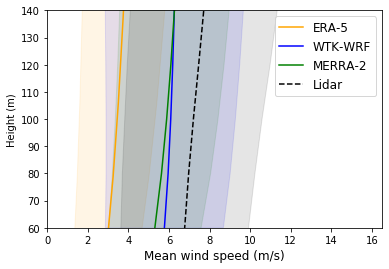

In [14]:
# Gordon Total Mean Wind Profile

# calculation of overall mean values for each dataset
GordonERAWSMean=GordonERAWS.mean(axis=0)
GordonWRFWSMean=GordonWRFWS.mean(axis=0)
GordonMERRAWSMean=GordonMERRAWS.mean(axis=0)
GordonLidarWSMean=np.nanmean(GordonLidarWS,axis=0)

# calculation of overall standard deviation values for each dataset
GordonERAWSStd=GordonERAWS.std(axis=0)
GordonWRFWSStd=GordonWRFWS.std(axis=0)
GordonMERRAWSStd=GordonMERRAWS.std(axis=0)
GordonLidarWSStd=np.nanstd(GordonLidarWS,axis=0)

plt.figure()

plt.plot(GordonERAWSMean,GordonERAZ,label='ERA-5',color='orange')
plt.plot(GordonWRFWSMean,GordonWRFZ,label='WTK-WRF',color='blue')
plt.plot(GordonMERRAWSMean,GordonMERRAZ,label='MERRA-2',color='green')
plt.plot(GordonLidarWSMean,GordonLidarZ,'--',color='black',label='Lidar')

plt.fill_betweenx(GordonERAZ,GordonERAWSMean-GordonERAWSStd,GordonERAWSMean+GordonERAWSStd,alpha=0.1,color='orange')
plt.fill_betweenx(GordonWRFZ,GordonWRFWSMean-GordonWRFWSStd,GordonWRFWSMean+GordonWRFWSStd,alpha=0.1,color='blue')
plt.fill_betweenx(GordonMERRAZ,GordonMERRAWSMean-GordonMERRAWSStd,GordonMERRAWSMean+GordonMERRAWSStd,alpha=0.1,color='green')
plt.fill_betweenx(GordonLidarZ,GordonLidarWSMean-GordonLidarWSStd,GordonLidarWSMean+GordonLidarWSStd,alpha=0.1,color='black')

plt.legend(fontsize=12)
plt.xlabel('Mean wind speed (m/s)', fontsize=12)
plt.ylabel('Height (m)')
plt.ylim([60,140])
plt.xlim([0,16.5])
# plt.savefig('GordonMeanTotal')
plt.show()

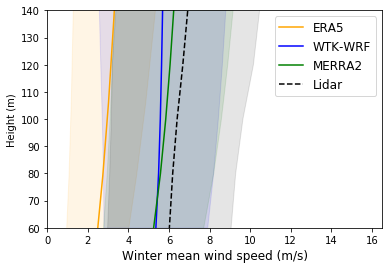

In [15]:
# Gordon Mean Wind Profile DJF

GordonERAWSDJFMean=GordonERAWSDJF.mean(axis=0)
GordonWRFWSDJFMean=GordonWRFWSDJF.mean(axis=0)
GordonMERRAWSDJFMean=GordonMERRAWSDJF.mean(axis=0)
GordonLidarWSDJFMean=np.nanmean(GordonLidarWSDJF,axis=0)

GordonERAWSDJFStd=GordonERAWSDJF.std(axis=0)
GordonWRFWSDJFStd=GordonWRFWSDJF.std(axis=0)
GordonMERRAWSDJFStd=GordonMERRAWSDJF.std(axis=0)
GordonLidarWSDJFStd=np.nanstd(GordonLidarWSDJF,axis=0)

plt.figure()

plt.plot(GordonERAWSDJFMean,GordonERAZ,label='ERA5',color='orange')
plt.plot(GordonWRFWSDJFMean,GordonWRFZ,label='WTK-WRF',color='blue')
plt.plot(GordonMERRAWSDJFMean,GordonMERRAZ,label='MERRA2',color='green')
plt.plot(GordonLidarWSDJFMean,GordonLidarZ,'--',color='black',label='Lidar')

plt.fill_betweenx(GordonERAZ,GordonERAWSDJFMean-GordonERAWSDJFStd,GordonERAWSDJFMean+GordonERAWSDJFStd,alpha=0.1,color='orange')
plt.fill_betweenx(GordonWRFZ,GordonWRFWSDJFMean-GordonWRFWSDJFStd,GordonWRFWSDJFMean+GordonWRFWSDJFStd,alpha=0.1,color='blue')
plt.fill_betweenx(GordonMERRAZ,GordonMERRAWSDJFMean-GordonMERRAWSDJFStd,GordonMERRAWSDJFMean+GordonMERRAWSDJFStd,alpha=0.1,color='green')
plt.fill_betweenx(GordonLidarZ,GordonLidarWSDJFMean-GordonLidarWSDJFStd,GordonLidarWSDJFMean+GordonLidarWSDJFStd,alpha=0.1,color='black')

plt.legend(fontsize=12)
plt.xlabel('Winter mean wind speed (m/s)', fontsize=12)
plt.ylabel('Height (m)')
plt.ylim([60,140])
plt.xlim([0,16.5])
# plt.savefig('GordonMeanDJF')
plt.show()

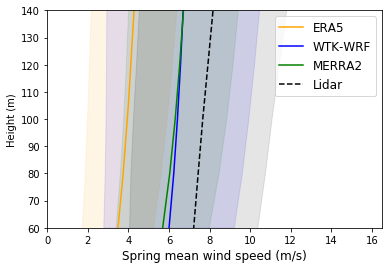

In [16]:
# Gordon Mean Wind Profile MAM

GordonERAWSMAMMean=GordonERAWSMAM.mean(axis=0)
GordonWRFWSMAMMean=GordonWRFWSMAM.mean(axis=0)
GordonMERRAWSMAMMean=GordonMERRAWSMAM.mean(axis=0)
GordonLidarWSMAMMean=np.nanmean(GordonLidarWSMAM,axis=0)

GordonERAWSMAMStd=GordonERAWSMAM.std(axis=0)
GordonWRFWSMAMStd=GordonWRFWSMAM.std(axis=0)
GordonMERRAWSMAMStd=GordonMERRAWSMAM.std(axis=0)
GordonLidarWSMAMStd=np.nanstd(GordonLidarWSMAM,axis=0)

plt.figure()

plt.plot(GordonERAWSMAMMean,GordonERAZ,label='ERA5',color='orange')
plt.plot(GordonWRFWSMAMMean,GordonWRFZ,label='WTK-WRF',color='blue')
plt.plot(GordonMERRAWSMAMMean,GordonMERRAZ,label='MERRA2',color='green')
plt.plot(GordonLidarWSMAMMean,GordonLidarZ,'--',color='black',label='Lidar')

plt.fill_betweenx(GordonERAZ,GordonERAWSMAMMean-GordonERAWSMAMStd,GordonERAWSMAMMean+GordonERAWSMAMStd,alpha=0.1,color='orange')
plt.fill_betweenx(GordonWRFZ,GordonWRFWSMAMMean-GordonWRFWSMAMStd,GordonWRFWSMAMMean+GordonWRFWSMAMStd,alpha=0.1,color='blue')
plt.fill_betweenx(GordonMERRAZ,GordonMERRAWSMAMMean-GordonMERRAWSMAMStd,GordonMERRAWSMAMMean+GordonMERRAWSMAMStd,alpha=0.1,color='green')
plt.fill_betweenx(GordonLidarZ,GordonLidarWSMAMMean-GordonLidarWSMAMStd,GordonLidarWSMAMMean+GordonLidarWSMAMStd,alpha=0.1,color='black')

plt.legend(fontsize=12)
plt.xlabel('Spring mean wind speed (m/s)', fontsize=12)
plt.ylabel('Height (m)')
plt.ylim([60,140])
plt.xlim([0,16.5])
# plt.savefig('GordonMeanMAM')
plt.show()

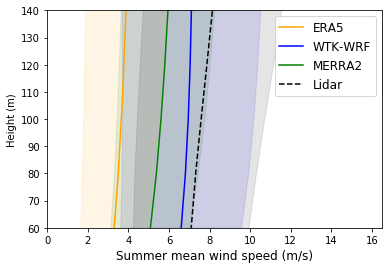

In [17]:
# Gordon Mean Wind Profile JJA

GordonERAWSJJAMean=GordonERAWSJJA.mean(axis=0)
GordonWRFWSJJAMean=GordonWRFWSJJA.mean(axis=0)
GordonMERRAWSJJAMean=GordonMERRAWSJJA.mean(axis=0)
GordonLidarWSJJAMean=np.nanmean(GordonLidarWSJJA,axis=0)

GordonERAWSJJAStd=GordonERAWSJJA.std(axis=0)
GordonWRFWSJJAStd=GordonWRFWSJJA.std(axis=0)
GordonMERRAWSJJAStd=GordonMERRAWSJJA.std(axis=0)
GordonLidarWSJJAStd=np.nanstd(GordonLidarWSJJA,axis=0)

plt.figure()

plt.plot(GordonERAWSJJAMean,GordonERAZ,label='ERA5',color='orange')
plt.plot(GordonWRFWSJJAMean,GordonWRFZ,label='WTK-WRF',color='blue')
plt.plot(GordonMERRAWSJJAMean,GordonMERRAZ,label='MERRA2',color='green')
plt.plot(GordonLidarWSJJAMean,GordonLidarZ,'--',color='black',label='Lidar')

plt.fill_betweenx(GordonERAZ,GordonERAWSJJAMean-GordonERAWSJJAStd,GordonERAWSJJAMean+GordonERAWSJJAStd,alpha=0.1,color='orange')
plt.fill_betweenx(GordonWRFZ,GordonWRFWSJJAMean-GordonWRFWSJJAStd,GordonWRFWSJJAMean+GordonWRFWSJJAStd,alpha=0.1,color='blue')
plt.fill_betweenx(GordonMERRAZ,GordonMERRAWSJJAMean-GordonMERRAWSJJAStd,GordonMERRAWSJJAMean+GordonMERRAWSJJAStd,alpha=0.1,color='green')
plt.fill_betweenx(GordonLidarZ,GordonLidarWSJJAMean-GordonLidarWSJJAStd,GordonLidarWSJJAMean+GordonLidarWSJJAStd,alpha=0.1,color='black')

plt.legend(fontsize=12)
plt.xlabel('Summer mean wind speed (m/s)', fontsize=12)
plt.ylabel('Height (m)')
plt.ylim([60,140])
plt.xlim([0,16.5])
# plt.savefig('GordonMeanJJA')
plt.show()

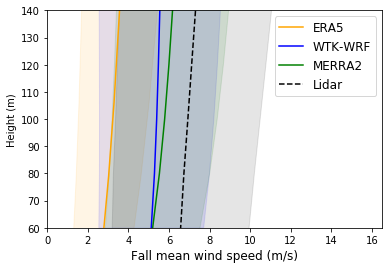

In [18]:
# Gordon Mean Wind Profile SON

GordonERAWSSONMean=GordonERAWSSON.mean(axis=0)
GordonWRFWSSONMean=GordonWRFWSSON.mean(axis=0)
GordonMERRAWSSONMean=GordonMERRAWSSON.mean(axis=0)
GordonLidarWSSONMean=np.nanmean(GordonLidarWSSON,axis=0)

GordonERAWSSONStd=GordonERAWSSON.std(axis=0)
GordonWRFWSSONStd=GordonWRFWSSON.std(axis=0)
GordonMERRAWSSONStd=GordonMERRAWSSON.std(axis=0)
GordonLidarWSSONStd=np.nanstd(GordonLidarWSSON,axis=0)

plt.figure()

plt.plot(GordonERAWSSONMean,GordonERAZ,label='ERA5',color='orange')
plt.plot(GordonWRFWSSONMean,GordonWRFZ,label='WTK-WRF',color='blue')
plt.plot(GordonMERRAWSSONMean,GordonMERRAZ,label='MERRA2',color='green')
plt.plot(GordonLidarWSSONMean,GordonLidarZ,'--',color='black',label='Lidar')

plt.fill_betweenx(GordonERAZ,GordonERAWSSONMean-GordonERAWSSONStd,GordonERAWSSONMean+GordonERAWSSONStd,alpha=0.1,color='orange')
plt.fill_betweenx(GordonWRFZ,GordonWRFWSSONMean-GordonWRFWSSONStd,GordonWRFWSSONMean+GordonWRFWSSONStd,alpha=0.1,color='blue')
plt.fill_betweenx(GordonMERRAZ,GordonMERRAWSSONMean-GordonMERRAWSSONStd,GordonMERRAWSSONMean+GordonMERRAWSSONStd,alpha=0.1,color='green')
plt.fill_betweenx(GordonLidarZ,GordonLidarWSSONMean-GordonLidarWSSONStd,GordonLidarWSSONMean+GordonLidarWSSONStd,alpha=0.1,color='black')

plt.legend(fontsize=12)
plt.xlabel('Fall mean wind speed (m/s)', fontsize=12)
plt.ylabel('Height (m)')
plt.ylim([60,140])
plt.xlim([0,16.5])
# plt.savefig('GordonMeanSON')
plt.show()

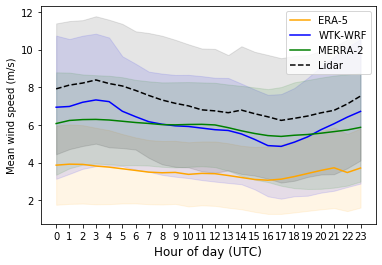

In [19]:
# Gordon Diurnal Cycle Total

plt.plot(GordonERAdiurnal, label='ERA-5',color='orange')
plt.plot(GordonWRFdiurnal,label='WTK-WRF',color='blue')
plt.plot(GordonMERRAdiurnal,label='MERRA-2',color='green')
plt.plot(GordonLidardiurnal,'--',label='Lidar',color='black')

plt.fill_between(np.arange(0,24,1),GordonERAdiurnal['wind speed']-GordonERAdiurnalStd['wind speed'],GordonERAdiurnal['wind speed']+GordonERAdiurnalStd['wind speed'],alpha=0.1,color='orange')
plt.fill_between(np.arange(0,24,1),GordonWRFdiurnal.windspeed_100m-GordonWRFdiurnalStd.windspeed_100m,GordonWRFdiurnal.windspeed_100m+GordonWRFdiurnalStd.windspeed_100m,alpha=0.1,color='blue')
plt.fill_between(np.arange(0,24,1),GordonMERRAdiurnal['100m wind speed']-GordonMERRAdiurnalStd['100m wind speed'],GordonMERRAdiurnal['100m wind speed']+GordonMERRAdiurnalStd['100m wind speed'],alpha=0.1,color='green')
plt.fill_between(np.arange(0,24,1),GordonLidardiurnal-GordonLidardiurnalStd,GordonLidardiurnal+GordonLidardiurnalStd,alpha=0.1,color='black')

plt.xlabel('Hour of day (UTC)', fontsize=12)
plt.ylabel('Mean wind speed (m/s)')
plt.legend()
plt.xticks(np.arange(0,24,1))
# plt.savefig('GordonDiurnalTotal')
plt.show()

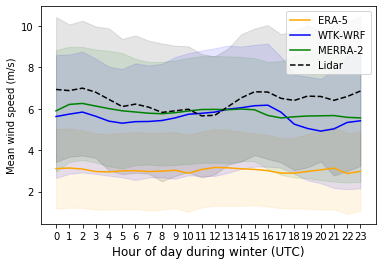

In [20]:
# Gordon Diurnal Cycle DJF

plt.plot(GordonERADJFdiurnal, label='ERA-5',color='orange')
plt.plot(GordonWRFDJFdiurnal,label='WTK-WRF',color='blue')
plt.plot(GordonMERRADJFdiurnal,label='MERRA-2',color='green')
plt.plot(GordonLidarDJFdiurnal,'--',label='Lidar',color='black')

plt.fill_between(np.arange(0,24,1),GordonERADJFdiurnal['wind speed']-GordonERADJFdiurnalStd['wind speed'],GordonERADJFdiurnal['wind speed']+GordonERADJFdiurnalStd['wind speed'],alpha=0.1,color='orange')
plt.fill_between(np.arange(0,24,1),GordonWRFDJFdiurnal.windspeed_100m-GordonWRFDJFdiurnalStd.windspeed_100m,GordonWRFDJFdiurnal.windspeed_100m+GordonWRFDJFdiurnalStd.windspeed_100m,alpha=0.1,color='blue')
plt.fill_between(np.arange(0,24,1),GordonMERRADJFdiurnal['100m wind speed']-GordonMERRADJFdiurnalStd['100m wind speed'],GordonMERRADJFdiurnal['100m wind speed']+GordonMERRADJFdiurnalStd['100m wind speed'],alpha=0.1,color='green')
plt.fill_between(np.arange(0,24,1),GordonLidarDJFdiurnal-GordonLidardiurnalDJFStd,GordonLidarDJFdiurnal+GordonLidardiurnalDJFStd,alpha=0.1,color='black')

plt.xlabel('Hour of day during winter (UTC)', fontsize=12)
plt.ylabel('Mean wind speed (m/s)')
plt.legend()
plt.xticks(np.arange(0,24,1))
# plt.savefig('GordonDiurnalDJF')
plt.show()

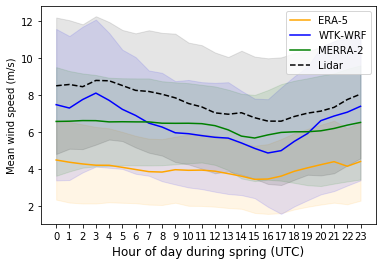

In [21]:
# Gordon Diurnal Cycle MAM

plt.plot(GordonERAMAMdiurnal, label='ERA-5',color='orange')
plt.plot(GordonWRFMAMdiurnal,label='WTK-WRF',color='blue')
plt.plot(GordonMERRAMAMdiurnal,label='MERRA-2',color='green')
plt.plot(GordonLidarMAMdiurnal,'--',label='Lidar',color='black')

plt.fill_between(np.arange(0,24,1),GordonERAMAMdiurnal['wind speed']-GordonERAMAMdiurnalStd['wind speed'],GordonERAMAMdiurnal['wind speed']+GordonERAMAMdiurnalStd['wind speed'],alpha=0.1,color='orange')
plt.fill_between(np.arange(0,24,1),GordonWRFMAMdiurnal.windspeed_100m-GordonWRFMAMdiurnalStd.windspeed_100m,GordonWRFMAMdiurnal.windspeed_100m+GordonWRFMAMdiurnalStd.windspeed_100m,alpha=0.1,color='blue')
plt.fill_between(np.arange(0,24,1),GordonMERRAMAMdiurnal['100m wind speed']-GordonMERRAMAMdiurnalStd['100m wind speed'],GordonMERRAMAMdiurnal['100m wind speed']+GordonMERRAMAMdiurnalStd['100m wind speed'],alpha=0.1,color='green')
plt.fill_between(np.arange(0,24,1),GordonLidarMAMdiurnal-GordonLidardiurnalMAMStd,GordonLidarMAMdiurnal+GordonLidardiurnalMAMStd,alpha=0.1,color='black')

plt.xlabel('Hour of day during spring (UTC)', fontsize=12)
plt.ylabel('Mean wind speed (m/s)')
plt.legend()
plt.xticks(np.arange(0,24,1))
# plt.savefig('GordonDiurnalMAM')
plt.show()

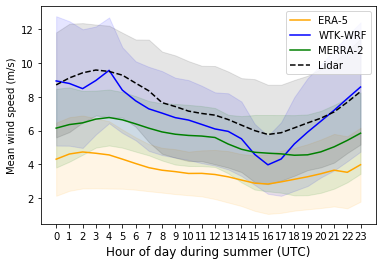

In [22]:
# Gordon Diurnal Cycle JJA

plt.plot(GordonERAJJAdiurnal, label='ERA-5',color='orange')
plt.plot(GordonWRFJJAdiurnal,label='WTK-WRF',color='blue')
plt.plot(GordonMERRAJJAdiurnal,label='MERRA-2',color='green')
plt.plot(GordonLidarJJAdiurnal,'--',label='Lidar',color='black')

plt.fill_between(np.arange(0,24,1),GordonERAJJAdiurnal['wind speed']-GordonERAJJAdiurnalStd['wind speed'],GordonERAJJAdiurnal['wind speed']+GordonERAJJAdiurnalStd['wind speed'],alpha=0.1,color='orange')
plt.fill_between(np.arange(0,24,1),GordonWRFJJAdiurnal.windspeed_100m-GordonWRFJJAdiurnalStd.windspeed_100m,GordonWRFJJAdiurnal.windspeed_100m+GordonWRFJJAdiurnalStd.windspeed_100m,alpha=0.1,color='blue')
plt.fill_between(np.arange(0,24,1),GordonMERRAJJAdiurnal['100m wind speed']-GordonMERRAJJAdiurnalStd['100m wind speed'],GordonMERRAJJAdiurnal['100m wind speed']+GordonMERRAJJAdiurnalStd['100m wind speed'],alpha=0.1,color='green')
plt.fill_between(np.arange(0,24,1),GordonLidarJJAdiurnal-GordonLidardiurnalJJAStd,GordonLidarJJAdiurnal+GordonLidardiurnalJJAStd,alpha=0.1,color='black')

plt.xlabel('Hour of day during summer (UTC)', fontsize=12)
plt.ylabel('Mean wind speed (m/s)')
plt.legend()
plt.xticks(np.arange(0,24,1))
# plt.savefig('GordonDiurnalJJA')
plt.show()

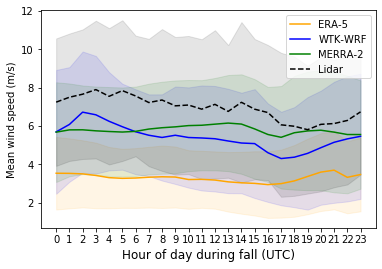

In [23]:
# Gordon Diurnal Cycle SON

plt.plot(GordonERASONdiurnal, label='ERA-5',color='orange')
plt.plot(GordonWRFSONdiurnal,label='WTK-WRF',color='blue')
plt.plot(GordonMERRASONdiurnal,label='MERRA-2',color='green')
plt.plot(GordonLidarSONdiurnal,'--',label='Lidar',color='black')

plt.fill_between(np.arange(0,24,1),GordonERASONdiurnal['wind speed']-GordonERASONdiurnalStd['wind speed'],GordonERASONdiurnal['wind speed']+GordonERASONdiurnalStd['wind speed'],alpha=0.1,color='orange')
plt.fill_between(np.arange(0,24,1),GordonWRFSONdiurnal.windspeed_100m-GordonWRFSONdiurnalStd.windspeed_100m,GordonWRFSONdiurnal.windspeed_100m+GordonWRFSONdiurnalStd.windspeed_100m,alpha=0.1,color='blue')
plt.fill_between(np.arange(0,24,1),GordonMERRASONdiurnal['100m wind speed']-GordonMERRASONdiurnalStd['100m wind speed'],GordonMERRASONdiurnal['100m wind speed']+GordonMERRASONdiurnalStd['100m wind speed'],alpha=0.1,color='green')
plt.fill_between(np.arange(0,24,1),GordonLidarSONdiurnal-GordonLidardiurnalSONStd,GordonLidarSONdiurnal+GordonLidardiurnalSONStd,alpha=0.1,color='black')

plt.xlabel('Hour of day during fall (UTC)', fontsize=12)
plt.ylabel('Mean wind speed (m/s)')
plt.legend()
plt.xticks(np.arange(0,24,1))
# plt.savefig('GordonDiurnalSON')
plt.show()

In [24]:
# ERA interpolation to match heights of other models + observations

# interpolation of 54 and 79 meter heights (66.5) used for comparison to 60 meters
GordonERAIntp67=(GordonERAWS[::,8]+GordonERAWS[::,7])/2

# interpolation of 106 and 137 meter heights (121.5) used for comparison to 120 meters
GordonERAIntp122=(GordonERAWS[::,6]+GordonERAWS[::,5])/2

In [25]:
# compilation of all comparison methods, heights into one matching dataframe with consistent time series

GordonWS=pd.DataFrame()
GordonWS['Time']=GordonMERRAdf.index

GordonWS['MERRA60']=GordonMERRAWS[::,1]
GordonWS['MERRA80']=GordonMERRAWS[::,2]
GordonWS['MERRA100']=GordonMERRAWS[::,3]
GordonWS['MERRA120']=GordonMERRAWS[::,4]
GordonWS['MERRA140']=GordonMERRAWS[::,5]

GordonWS['Lidar60']=GordonLidarWS[::,1]
GordonWS['Lidar80']=GordonLidarWS[::,2]
GordonWS['Lidar100']=GordonLidarWS[::,3]
GordonWS['Lidar120']=GordonLidarWS[::,4]
GordonWS['Lidar140']=GordonLidarWS[::,5]

GordonWS['WRF60']=GordonWRFWS[::,0]
GordonWS['WRF80']=GordonWRFWS[::,1]
GordonWS['WRF100']=GordonWRFWS[::,2]
GordonWS['WRF120']=GordonWRFWS[::,3]
GordonWS['WRF140']=GordonWRFWS[::,4]

GordonWS['ERA66.5']=GordonERAIntp67
GordonWS['ERA79']=GordonERAWS[::,7]
GordonWS['ERA106']=GordonERAWS[::,6]
GordonWS['ERA121.5']=GordonERAIntp122
GordonWS['ERA140']=GordonERAWS[::,5]

GordonZComp=[60,80,100,120,140]
# GordonWS

GordonWSnan=GordonWS.dropna()

GordonWSnanDJF=GordonWSnan[(GordonWSnan.Time.str.contains('-12-'))|(GordonWSnan.Time.str.contains('-01-'))|(GordonWSnan.Time.str.contains('-02-'))]
GordonWSnanMAM=GordonWSnan[(GordonWSnan.Time.str.contains('-03-'))|(GordonWSnan.Time.str.contains('-04-'))|(GordonWSnan.Time.str.contains('-05-'))]
GordonWSnanJJA=GordonWSnan[(GordonWSnan.Time.str.contains('-06-'))|(GordonWSnan.Time.str.contains('-07-'))|(GordonWSnan.Time.str.contains('-08-'))]
GordonWSnanSON=GordonWSnan[(GordonWSnan.Time.str.contains('-09-'))|(GordonWSnan.Time.str.contains('-10-'))|(GordonWSnan.Time.str.contains('-11-'))]

In [26]:
# Gordon Bias Total

GordonBiasERA=np.zeros((8784,5))

GordonBiasERA[::,0]=(GordonWS['ERA66.5'])-(GordonWS['Lidar60'])
GordonBiasERA[::,1]=(GordonWS['ERA79'])-(GordonWS['Lidar80'])
GordonBiasERA[::,2]=(GordonWS['ERA106'])-(GordonWS['Lidar100'])
GordonBiasERA[::,3]=(GordonWS['ERA121.5'])-(GordonWS['Lidar120'])
GordonBiasERA[::,4]=(GordonWS['ERA140'])-(GordonWS['Lidar140'])

GordonBiasMERRA=np.zeros((8784,5))

GordonBiasMERRA[::,0]=(GordonWS['MERRA60'])-(GordonWS['Lidar60'])
GordonBiasMERRA[::,1]=(GordonWS['MERRA80'])-(GordonWS['Lidar80'])
GordonBiasMERRA[::,2]=(GordonWS['MERRA100'])-(GordonWS['Lidar100'])
GordonBiasMERRA[::,3]=(GordonWS['MERRA120'])-(GordonWS['Lidar120'])
GordonBiasMERRA[::,4]=(GordonWS['MERRA140'])-(GordonWS['Lidar140'])

GordonBiasWRF=np.zeros((8784,5))

GordonBiasWRF[::,0]=(GordonWS['WRF60'])-(GordonWS['Lidar60'])
GordonBiasWRF[::,1]=(GordonWS['WRF80'])-(GordonWS['Lidar80'])
GordonBiasWRF[::,2]=(GordonWS['WRF100'])-(GordonWS['Lidar100'])
GordonBiasWRF[::,3]=(GordonWS['WRF120'])-(GordonWS['Lidar120'])
GordonBiasWRF[::,4]=(GordonWS['WRF140'])-(GordonWS['Lidar140'])

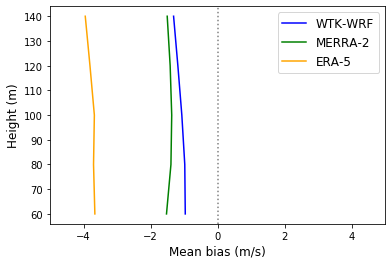

In [27]:
# Gordon Bias Total

fig,ax=plt.subplots()

ax.plot(np.nanmean(GordonBiasWRF,axis=0),GordonZComp, label = 'WTK-WRF',color='blue')
ax.plot(np.nanmean(GordonBiasMERRA,axis=0),GordonZComp,label='MERRA-2',color='green')
ax.plot(np.nanmean(GordonBiasERA,axis=0),GordonZComp,label='ERA-5',color='orange')

ax.axvline(x = 0, linestyle = 'dotted', alpha = 0.5, c = 'k')
ax.legend(fontsize = 12)
ax.set_xlabel('Mean bias (m/s)', fontsize = 12)
ax.set_ylabel('Height (m)', fontsize = 12)
ax.set_xlim([-5,5])

# plt.savefig('GordonBiasTotal')
plt.show()

In [28]:
# Gordon Bias DJF


GordonBiasDJFERA=np.zeros((1379,5))

GordonBiasDJFERA[::,0]=(GordonWSnanDJF['ERA66.5'])-(GordonWSnanDJF['Lidar60'])
GordonBiasDJFERA[::,1]=(GordonWSnanDJF['ERA79'])-(GordonWSnanDJF['Lidar80'])
GordonBiasDJFERA[::,2]=(GordonWSnanDJF['ERA106'])-(GordonWSnanDJF['Lidar100'])
GordonBiasDJFERA[::,3]=(GordonWSnanDJF['ERA121.5'])-(GordonWSnanDJF['Lidar120'])
GordonBiasDJFERA[::,4]=(GordonWSnanDJF['ERA140'])-(GordonWSnanDJF['Lidar140'])

GordonBiasDJFMERRA=np.zeros((1379,5))

GordonBiasDJFMERRA[::,0]=(GordonWSnanDJF['MERRA60'])-(GordonWSnanDJF['Lidar60'])
GordonBiasDJFMERRA[::,1]=(GordonWSnanDJF['MERRA80'])-(GordonWSnanDJF['Lidar80'])
GordonBiasDJFMERRA[::,2]=(GordonWSnanDJF['MERRA100'])-(GordonWSnanDJF['Lidar100'])
GordonBiasDJFMERRA[::,3]=(GordonWSnanDJF['MERRA120'])-(GordonWSnanDJF['Lidar120'])
GordonBiasDJFMERRA[::,4]=(GordonWSnanDJF['MERRA140'])-(GordonWSnanDJF['Lidar140'])

GordonBiasDJFWRF=np.zeros((1379,5))

GordonBiasDJFWRF[::,0]=(GordonWSnanDJF['WRF60'])-(GordonWSnanDJF['Lidar60'])
GordonBiasDJFWRF[::,1]=(GordonWSnanDJF['WRF80'])-(GordonWSnanDJF['Lidar80'])
GordonBiasDJFWRF[::,2]=(GordonWSnanDJF['WRF100'])-(GordonWSnanDJF['Lidar100'])
GordonBiasDJFWRF[::,3]=(GordonWSnanDJF['WRF120'])-(GordonWSnanDJF['Lidar120'])
GordonBiasDJFWRF[::,4]=(GordonWSnanDJF['WRF140'])-(GordonWSnanDJF['Lidar140'])

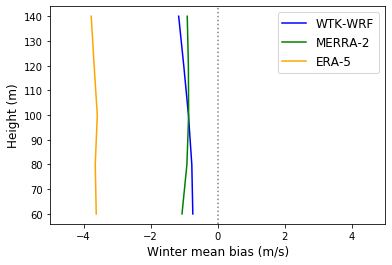

In [29]:
# Gordon Bias DJF

fig,ax=plt.subplots()
ax.plot(np.nanmean(GordonBiasDJFWRF,axis=0),GordonZComp, label = 'WTK-WRF',color='blue')
ax.plot(np.nanmean(GordonBiasDJFMERRA,axis=0),GordonZComp,label='MERRA-2',color='green')
ax.plot(np.nanmean(GordonBiasDJFERA,axis=0),GordonZComp,label='ERA-5',color='orange')

ax.axvline(x = 0, linestyle = 'dotted', alpha = 0.5, c = 'k')
ax.legend(fontsize = 12)
ax.set_xlabel('Winter mean bias (m/s)', fontsize = 12)
ax.set_ylabel('Height (m)', fontsize = 12)
ax.set_xlim([-5,5])
# plt.savefig('GordonBiasDJF')
plt.show()

In [30]:
# Gordon Bias MAM


GordonBiasMAMERA=np.zeros((2024,5))

GordonBiasMAMERA[::,0]=(GordonWSnanMAM['ERA66.5'])-(GordonWSnanMAM['Lidar60'])
GordonBiasMAMERA[::,1]=(GordonWSnanMAM['ERA79'])-(GordonWSnanMAM['Lidar80'])
GordonBiasMAMERA[::,2]=(GordonWSnanMAM['ERA106'])-(GordonWSnanMAM['Lidar100'])
GordonBiasMAMERA[::,3]=(GordonWSnanMAM['ERA121.5'])-(GordonWSnanMAM['Lidar120'])
GordonBiasMAMERA[::,4]=(GordonWSnanMAM['ERA140'])-(GordonWSnanMAM['Lidar140'])

GordonBiasMAMMERRA=np.zeros((2024,5))

GordonBiasMAMMERRA[::,0]=(GordonWSnanMAM['MERRA60'])-(GordonWSnanMAM['Lidar60'])
GordonBiasMAMMERRA[::,1]=(GordonWSnanMAM['MERRA80'])-(GordonWSnanMAM['Lidar80'])
GordonBiasMAMMERRA[::,2]=(GordonWSnanMAM['MERRA100'])-(GordonWSnanMAM['Lidar100'])
GordonBiasMAMMERRA[::,3]=(GordonWSnanMAM['MERRA120'])-(GordonWSnanMAM['Lidar120'])
GordonBiasMAMMERRA[::,4]=(GordonWSnanMAM['MERRA140'])-(GordonWSnanMAM['Lidar140'])

GordonBiasMAMWRF=np.zeros((2024,5))

GordonBiasMAMWRF[::,0]=(GordonWSnanMAM['WRF60'])-(GordonWSnanMAM['Lidar60'])
GordonBiasMAMWRF[::,1]=(GordonWSnanMAM['WRF80'])-(GordonWSnanMAM['Lidar80'])
GordonBiasMAMWRF[::,2]=(GordonWSnanMAM['WRF100'])-(GordonWSnanMAM['Lidar100'])
GordonBiasMAMWRF[::,3]=(GordonWSnanMAM['WRF120'])-(GordonWSnanMAM['Lidar120'])
GordonBiasMAMWRF[::,4]=(GordonWSnanMAM['WRF140'])-(GordonWSnanMAM['Lidar140'])

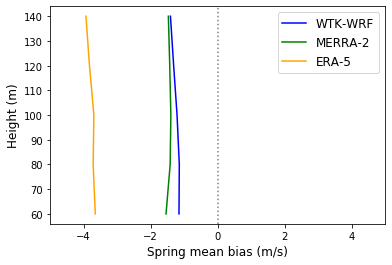

In [31]:
# Gordon Bias MAM

fig,ax=plt.subplots()
ax.plot(np.nanmean(GordonBiasMAMWRF,axis=0),GordonZComp, label = 'WTK-WRF',color='blue')
ax.plot(np.nanmean(GordonBiasMAMMERRA,axis=0),GordonZComp,label='MERRA-2',color='green')
ax.plot(np.nanmean(GordonBiasMAMERA,axis=0),GordonZComp,label='ERA-5',color='orange')

ax.axvline(x = 0, linestyle = 'dotted', alpha = 0.5, c = 'k')
ax.legend(fontsize = 12)
ax.set_xlabel('Spring mean bias (m/s)', fontsize = 12)
ax.set_ylabel('Height (m)', fontsize = 12)
ax.set_xlim([-5,5])
# plt.savefig('GordonBiasMAM')
plt.show()

In [32]:
# Gordon Bias JJA


GordonBiasJJAERA=np.zeros((2061,5))

GordonBiasJJAERA[::,0]=(GordonWSnanJJA['ERA66.5'])-(GordonWSnanJJA['Lidar60'])
GordonBiasJJAERA[::,1]=(GordonWSnanJJA['ERA79'])-(GordonWSnanJJA['Lidar80'])
GordonBiasJJAERA[::,2]=(GordonWSnanJJA['ERA106'])-(GordonWSnanJJA['Lidar100'])
GordonBiasJJAERA[::,3]=(GordonWSnanJJA['ERA121.5'])-(GordonWSnanJJA['Lidar120'])
GordonBiasJJAERA[::,4]=(GordonWSnanJJA['ERA140'])-(GordonWSnanJJA['Lidar140'])

GordonBiasJJAMERRA=np.zeros((2061,5))

GordonBiasJJAMERRA[::,0]=(GordonWSnanJJA['MERRA60'])-(GordonWSnanJJA['Lidar60'])
GordonBiasJJAMERRA[::,1]=(GordonWSnanJJA['MERRA80'])-(GordonWSnanJJA['Lidar80'])
GordonBiasJJAMERRA[::,2]=(GordonWSnanJJA['MERRA100'])-(GordonWSnanJJA['Lidar100'])
GordonBiasJJAMERRA[::,3]=(GordonWSnanJJA['MERRA120'])-(GordonWSnanJJA['Lidar120'])
GordonBiasJJAMERRA[::,4]=(GordonWSnanJJA['MERRA140'])-(GordonWSnanJJA['Lidar140'])

GordonBiasJJAWRF=np.zeros((2061,5))

GordonBiasJJAWRF[::,0]=(GordonWSnanJJA['WRF60'])-(GordonWSnanJJA['Lidar60'])
GordonBiasJJAWRF[::,1]=(GordonWSnanJJA['WRF80'])-(GordonWSnanJJA['Lidar80'])
GordonBiasJJAWRF[::,2]=(GordonWSnanJJA['WRF100'])-(GordonWSnanJJA['Lidar100'])
GordonBiasJJAWRF[::,3]=(GordonWSnanJJA['WRF120'])-(GordonWSnanJJA['Lidar120'])
GordonBiasJJAWRF[::,4]=(GordonWSnanJJA['WRF140'])-(GordonWSnanJJA['Lidar140'])

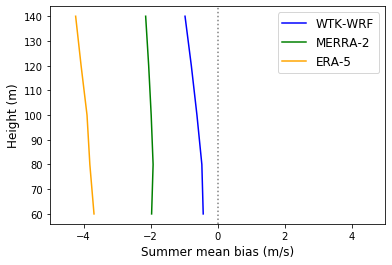

In [33]:
# Gordon Bias JJA

fig,ax=plt.subplots()
ax.plot(np.nanmean(GordonBiasJJAWRF,axis=0),GordonZComp, label = 'WTK-WRF',color='blue')
ax.plot(np.nanmean(GordonBiasJJAMERRA,axis=0),GordonZComp,label='MERRA-2',color='green')
ax.plot(np.nanmean(GordonBiasJJAERA,axis=0),GordonZComp,label='ERA-5',color='orange')

ax.axvline(x = 0, linestyle = 'dotted', alpha = 0.5, c = 'k')
ax.legend(fontsize = 12)
ax.set_xlabel('Summer mean bias (m/s)', fontsize = 12)
ax.set_ylabel('Height (m)', fontsize = 12)
ax.set_xlim([-5,5])
# plt.savefig('GordonBiasJJA')
plt.show()

In [34]:
# Gordon Bias SON


GordonBiasSONERA=np.zeros((1757,5))

GordonBiasSONERA[::,0]=(GordonWSnanSON['ERA66.5'])-(GordonWSnanSON['Lidar60'])
GordonBiasSONERA[::,1]=(GordonWSnanSON['ERA79'])-(GordonWSnanSON['Lidar80'])
GordonBiasSONERA[::,2]=(GordonWSnanSON['ERA106'])-(GordonWSnanSON['Lidar100'])
GordonBiasSONERA[::,3]=(GordonWSnanSON['ERA121.5'])-(GordonWSnanSON['Lidar120'])
GordonBiasSONERA[::,4]=(GordonWSnanSON['ERA140'])-(GordonWSnanSON['Lidar140'])

GordonBiasSONMERRA=np.zeros((1757,5))

GordonBiasSONMERRA[::,0]=(GordonWSnanSON['MERRA60'])-(GordonWSnanSON['Lidar60'])
GordonBiasSONMERRA[::,1]=(GordonWSnanSON['MERRA80'])-(GordonWSnanSON['Lidar80'])
GordonBiasSONMERRA[::,2]=(GordonWSnanSON['MERRA100'])-(GordonWSnanSON['Lidar100'])
GordonBiasSONMERRA[::,3]=(GordonWSnanSON['MERRA120'])-(GordonWSnanSON['Lidar120'])
GordonBiasSONMERRA[::,4]=(GordonWSnanSON['MERRA140'])-(GordonWSnanSON['Lidar140'])

GordonBiasSONWRF=np.zeros((1757,5))

GordonBiasSONWRF[::,0]=(GordonWSnanSON['WRF60'])-(GordonWSnanSON['Lidar60'])
GordonBiasSONWRF[::,1]=(GordonWSnanSON['WRF80'])-(GordonWSnanSON['Lidar80'])
GordonBiasSONWRF[::,2]=(GordonWSnanSON['WRF100'])-(GordonWSnanSON['Lidar100'])
GordonBiasSONWRF[::,3]=(GordonWSnanSON['WRF120'])-(GordonWSnanSON['Lidar120'])
GordonBiasSONWRF[::,4]=(GordonWSnanSON['WRF140'])-(GordonWSnanSON['Lidar140'])

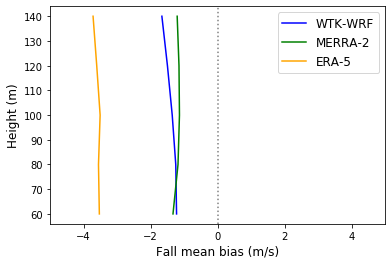

In [35]:
# Gordon Bias SON

fig,ax=plt.subplots()
ax.plot(np.nanmean(GordonBiasSONWRF,axis=0),GordonZComp, label = 'WTK-WRF',color='blue')
ax.plot(np.nanmean(GordonBiasSONMERRA,axis=0),GordonZComp,label='MERRA-2',color='green')
ax.plot(np.nanmean(GordonBiasSONERA,axis=0),GordonZComp,label='ERA-5',color='orange')

ax.axvline(x = 0, linestyle = 'dotted', alpha = 0.5, c = 'k')
ax.legend(fontsize = 12)
ax.set_xlabel('Fall mean bias (m/s)', fontsize = 12)
ax.set_ylabel('Height (m)', fontsize = 12)
ax.set_xlim([-5,5])
# plt.savefig('GordonBiasSON')
plt.show()

In [36]:
# Gordon CC Total

GordonR2ERA=np.zeros(5)
GordonR2ERA[0]=np.power((np.corrcoef(GordonWSnan['Lidar60'],GordonWSnan['ERA66.5'])[0,1]),2)
GordonR2ERA[1]=np.power((np.corrcoef(GordonWSnan['Lidar80'],GordonWSnan['ERA79'])[0,1]),2)
GordonR2ERA[2]=np.power((np.corrcoef(GordonWSnan['Lidar100'],GordonWSnan['ERA106'])[0,1]),2)
GordonR2ERA[3]=np.power((np.corrcoef(GordonWSnan['Lidar120'],GordonWSnan['ERA121.5'])[0,1]),2)
GordonR2ERA[4]=np.power((np.corrcoef(GordonWSnan['Lidar140'],GordonWSnan['ERA140'])[0,1]),2)

GordonR2MERRA=np.zeros(5)
GordonR2MERRA[0]=np.power((np.corrcoef(GordonWSnan['Lidar60'],GordonWSnan['MERRA60'])[0,1]),2)
GordonR2MERRA[1]=np.power((np.corrcoef(GordonWSnan['Lidar80'],GordonWSnan['MERRA80'])[0,1]),2)
GordonR2MERRA[2]=np.power((np.corrcoef(GordonWSnan['Lidar100'],GordonWSnan['MERRA100'])[0,1]),2)
GordonR2MERRA[3]=np.power((np.corrcoef(GordonWSnan['Lidar120'],GordonWSnan['MERRA120'])[0,1]),2)
GordonR2MERRA[4]=np.power((np.corrcoef(GordonWSnan['Lidar140'],GordonWSnan['MERRA140'])[0,1]),2)

GordonR2WRF=np.zeros(5)
GordonR2WRF[0]=np.power((np.corrcoef(GordonWSnan['Lidar60'],GordonWSnan['WRF60'])[0,1]),2)
GordonR2WRF[1]=np.power((np.corrcoef(GordonWSnan['Lidar80'],GordonWSnan['WRF80'])[0,1]),2)
GordonR2WRF[2]=np.power((np.corrcoef(GordonWSnan['Lidar100'],GordonWSnan['WRF100'])[0,1]),2)
GordonR2WRF[3]=np.power((np.corrcoef(GordonWSnan['Lidar120'],GordonWSnan['WRF120'])[0,1]),2)
GordonR2WRF[4]=np.power((np.corrcoef(GordonWSnan['Lidar140'],GordonWSnan['WRF140'])[0,1]),2)

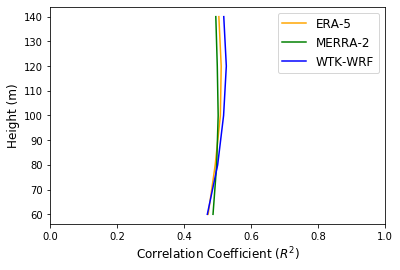

In [37]:
# Gordon CC Total

fig,ax=plt.subplots()
ax.plot(GordonR2ERA,GordonZComp, label = 'ERA-5',color='orange')
ax.plot(GordonR2MERRA,GordonZComp,label='MERRA-2',color='green')
ax.plot(GordonR2WRF,GordonZComp,label='WTK-WRF',color='blue')

ax.legend(fontsize = 12)
ax.set_xlabel('Correlation Coefficient ($R^2$)', fontsize = 12)
ax.set_ylabel('Height (m)', fontsize = 12)
ax.set_xlim([0,1])
# plt.savefig('GordonR2Total')
plt.show()

In [38]:
# Gordon CC DJF

GordonR2DJFERA=np.zeros(5)
GordonR2DJFERA[0]=np.power((np.corrcoef(GordonWSnanDJF['Lidar60'],GordonWSnanDJF['ERA66.5'])[0,1]),2)
GordonR2DJFERA[1]=np.power((np.corrcoef(GordonWSnanDJF['Lidar80'],GordonWSnanDJF['ERA79'])[0,1]),2)
GordonR2DJFERA[2]=np.power((np.corrcoef(GordonWSnanDJF['Lidar100'],GordonWSnanDJF['ERA106'])[0,1]),2)
GordonR2DJFERA[3]=np.power((np.corrcoef(GordonWSnanDJF['Lidar120'],GordonWSnanDJF['ERA121.5'])[0,1]),2)
GordonR2DJFERA[4]=np.power((np.corrcoef(GordonWSnanDJF['Lidar140'],GordonWSnanDJF['ERA140'])[0,1]),2)

GordonR2DJFMERRA=np.zeros(5)
GordonR2DJFMERRA[0]=np.power((np.corrcoef(GordonWSnanDJF['Lidar60'],GordonWSnanDJF['MERRA60'])[0,1]),2)
GordonR2DJFMERRA[1]=np.power((np.corrcoef(GordonWSnanDJF['Lidar80'],GordonWSnanDJF['MERRA80'])[0,1]),2)
GordonR2DJFMERRA[2]=np.power((np.corrcoef(GordonWSnanDJF['Lidar100'],GordonWSnanDJF['MERRA100'])[0,1]),2)
GordonR2DJFMERRA[3]=np.power((np.corrcoef(GordonWSnanDJF['Lidar120'],GordonWSnanDJF['MERRA120'])[0,1]),2)
GordonR2DJFMERRA[4]=np.power((np.corrcoef(GordonWSnanDJF['Lidar140'],GordonWSnanDJF['MERRA140'])[0,1]),2)

GordonR2DJFWRF=np.zeros(5)
GordonR2DJFWRF[0]=np.power((np.corrcoef(GordonWSnanDJF['Lidar60'],GordonWSnanDJF['WRF60'])[0,1]),2)
GordonR2DJFWRF[1]=np.power((np.corrcoef(GordonWSnanDJF['Lidar80'],GordonWSnanDJF['WRF80'])[0,1]),2)
GordonR2DJFWRF[2]=np.power((np.corrcoef(GordonWSnanDJF['Lidar100'],GordonWSnanDJF['WRF100'])[0,1]),2)
GordonR2DJFWRF[3]=np.power((np.corrcoef(GordonWSnanDJF['Lidar120'],GordonWSnanDJF['WRF120'])[0,1]),2)
GordonR2DJFWRF[4]=np.power((np.corrcoef(GordonWSnanDJF['Lidar140'],GordonWSnanDJF['WRF140'])[0,1]),2)

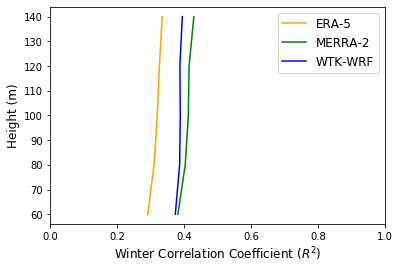

In [39]:
# Gordon CC DJF

fig,ax=plt.subplots()

ax.plot(GordonR2DJFERA,GordonZComp, label = 'ERA-5',color='orange')
ax.plot(GordonR2DJFMERRA,GordonZComp,label='MERRA-2',color='green')
ax.plot(GordonR2DJFWRF,GordonZComp,label='WTK-WRF',color='blue')

ax.legend(fontsize = 12)
ax.set_xlabel('Winter Correlation Coefficient ($R^2$)', fontsize = 12)
ax.set_ylabel('Height (m)', fontsize = 12)
ax.set_xlim([0,1])
# plt.savefig('GordonR2DJF')
plt.show()

In [40]:
# Gordon CC MAM

GordonR2MAMERA=np.zeros(5)
GordonR2MAMERA[0]=np.power((np.corrcoef(GordonWSnanMAM['Lidar60'],GordonWSnanMAM['ERA66.5'])[0,1]),2)
GordonR2MAMERA[1]=np.power((np.corrcoef(GordonWSnanMAM['Lidar80'],GordonWSnanMAM['ERA79'])[0,1]),2)
GordonR2MAMERA[2]=np.power((np.corrcoef(GordonWSnanMAM['Lidar100'],GordonWSnanMAM['ERA106'])[0,1]),2)
GordonR2MAMERA[3]=np.power((np.corrcoef(GordonWSnanMAM['Lidar120'],GordonWSnanMAM['ERA121.5'])[0,1]),2)
GordonR2MAMERA[4]=np.power((np.corrcoef(GordonWSnanMAM['Lidar140'],GordonWSnanMAM['ERA140'])[0,1]),2)

GordonR2MAMMERRA=np.zeros(5)
GordonR2MAMMERRA[0]=np.power((np.corrcoef(GordonWSnanMAM['Lidar60'],GordonWSnanMAM['MERRA60'])[0,1]),2)
GordonR2MAMMERRA[1]=np.power((np.corrcoef(GordonWSnanMAM['Lidar80'],GordonWSnanMAM['MERRA80'])[0,1]),2)
GordonR2MAMMERRA[2]=np.power((np.corrcoef(GordonWSnanMAM['Lidar100'],GordonWSnanMAM['MERRA100'])[0,1]),2)
GordonR2MAMMERRA[3]=np.power((np.corrcoef(GordonWSnanMAM['Lidar120'],GordonWSnanMAM['MERRA120'])[0,1]),2)
GordonR2MAMMERRA[4]=np.power((np.corrcoef(GordonWSnanMAM['Lidar140'],GordonWSnanMAM['MERRA140'])[0,1]),2)

GordonR2MAMWRF=np.zeros(5)
GordonR2MAMWRF[0]=np.power((np.corrcoef(GordonWSnanMAM['Lidar60'],GordonWSnanMAM['WRF60'])[0,1]),2)
GordonR2MAMWRF[1]=np.power((np.corrcoef(GordonWSnanMAM['Lidar80'],GordonWSnanMAM['WRF80'])[0,1]),2)
GordonR2MAMWRF[2]=np.power((np.corrcoef(GordonWSnanMAM['Lidar100'],GordonWSnanMAM['WRF100'])[0,1]),2)
GordonR2MAMWRF[3]=np.power((np.corrcoef(GordonWSnanMAM['Lidar120'],GordonWSnanMAM['WRF120'])[0,1]),2)
GordonR2MAMWRF[4]=np.power((np.corrcoef(GordonWSnanMAM['Lidar140'],GordonWSnanMAM['WRF140'])[0,1]),2)

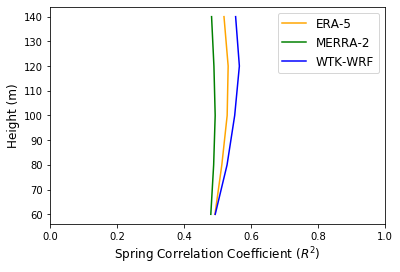

In [41]:
# Gordon CC MAM

fig,ax=plt.subplots()

ax.plot(GordonR2MAMERA,GordonZComp, label = 'ERA-5',color='orange')
ax.plot(GordonR2MAMMERRA,GordonZComp,label='MERRA-2',color='green')
ax.plot(GordonR2MAMWRF,GordonZComp,label='WTK-WRF',color='blue')

ax.legend(fontsize = 12)
ax.set_xlabel('Spring Correlation Coefficient ($R^2$)', fontsize = 12)
ax.set_ylabel('Height (m)', fontsize = 12)
ax.set_xlim([0,1])
# plt.savefig('GordonR2MAM')
plt.show()

In [42]:
# Gordon CC JJA

GordonR2JJAERA=np.zeros(5)
GordonR2JJAERA[0]=np.power((np.corrcoef(GordonWSnanJJA['Lidar60'],GordonWSnanJJA['ERA66.5'])[0,1]),2)
GordonR2JJAERA[1]=np.power((np.corrcoef(GordonWSnanJJA['Lidar80'],GordonWSnanJJA['ERA79'])[0,1]),2)
GordonR2JJAERA[2]=np.power((np.corrcoef(GordonWSnanJJA['Lidar100'],GordonWSnanJJA['ERA106'])[0,1]),2)
GordonR2JJAERA[3]=np.power((np.corrcoef(GordonWSnanJJA['Lidar120'],GordonWSnanJJA['ERA121.5'])[0,1]),2)
GordonR2JJAERA[4]=np.power((np.corrcoef(GordonWSnanJJA['Lidar140'],GordonWSnanJJA['ERA140'])[0,1]),2)

GordonR2JJAMERRA=np.zeros(5)
GordonR2JJAMERRA[0]=np.power((np.corrcoef(GordonWSnanJJA['Lidar60'],GordonWSnanJJA['MERRA60'])[0,1]),2)
GordonR2JJAMERRA[1]=np.power((np.corrcoef(GordonWSnanJJA['Lidar80'],GordonWSnanJJA['MERRA80'])[0,1]),2)
GordonR2JJAMERRA[2]=np.power((np.corrcoef(GordonWSnanJJA['Lidar100'],GordonWSnanJJA['MERRA100'])[0,1]),2)
GordonR2JJAMERRA[3]=np.power((np.corrcoef(GordonWSnanJJA['Lidar120'],GordonWSnanJJA['MERRA120'])[0,1]),2)
GordonR2JJAMERRA[4]=np.power((np.corrcoef(GordonWSnanJJA['Lidar140'],GordonWSnanJJA['MERRA140'])[0,1]),2)

GordonR2JJAWRF=np.zeros(5)
GordonR2JJAWRF[0]=np.power((np.corrcoef(GordonWSnanJJA['Lidar60'],GordonWSnanJJA['WRF60'])[0,1]),2)
GordonR2JJAWRF[1]=np.power((np.corrcoef(GordonWSnanJJA['Lidar80'],GordonWSnanJJA['WRF80'])[0,1]),2)
GordonR2JJAWRF[2]=np.power((np.corrcoef(GordonWSnanJJA['Lidar100'],GordonWSnanJJA['WRF100'])[0,1]),2)
GordonR2JJAWRF[3]=np.power((np.corrcoef(GordonWSnanJJA['Lidar120'],GordonWSnanJJA['WRF120'])[0,1]),2)
GordonR2JJAWRF[4]=np.power((np.corrcoef(GordonWSnanJJA['Lidar140'],GordonWSnanJJA['WRF140'])[0,1]),2)

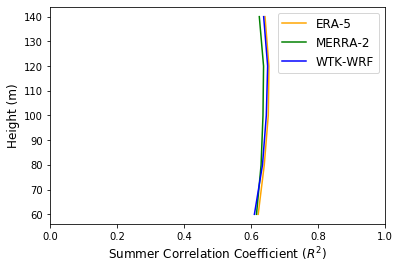

In [43]:
# Gordon CC JJA

fig,ax=plt.subplots()

ax.plot(GordonR2JJAERA,GordonZComp, label = 'ERA-5',color='orange')
ax.plot(GordonR2JJAMERRA,GordonZComp,label='MERRA-2',color='green')
ax.plot(GordonR2JJAWRF,GordonZComp,label='WTK-WRF',color='blue')

ax.legend(fontsize = 12)
ax.set_xlabel('Summer Correlation Coefficient ($R^2$)', fontsize = 12)
ax.set_ylabel('Height (m)', fontsize = 12)
ax.set_xlim([0,1])
# plt.savefig('GordonR2JJA')
plt.show()

In [44]:
# Gordon CC SON

GordonR2SONERA=np.zeros(5)
GordonR2SONERA[0]=np.power((np.corrcoef(GordonWSnanSON['Lidar60'],GordonWSnanSON['ERA66.5'])[0,1]),2)
GordonR2SONERA[1]=np.power((np.corrcoef(GordonWSnanSON['Lidar80'],GordonWSnanSON['ERA79'])[0,1]),2)
GordonR2SONERA[2]=np.power((np.corrcoef(GordonWSnanSON['Lidar100'],GordonWSnanSON['ERA106'])[0,1]),2)
GordonR2SONERA[3]=np.power((np.corrcoef(GordonWSnanSON['Lidar120'],GordonWSnanSON['ERA121.5'])[0,1]),2)
GordonR2SONERA[4]=np.power((np.corrcoef(GordonWSnanSON['Lidar140'],GordonWSnanSON['ERA140'])[0,1]),2)

GordonR2SONMERRA=np.zeros(5)
GordonR2SONMERRA[0]=np.power((np.corrcoef(GordonWSnanSON['Lidar60'],GordonWSnanSON['MERRA60'])[0,1]),2)
GordonR2SONMERRA[1]=np.power((np.corrcoef(GordonWSnanSON['Lidar80'],GordonWSnanSON['MERRA80'])[0,1]),2)
GordonR2SONMERRA[2]=np.power((np.corrcoef(GordonWSnanSON['Lidar100'],GordonWSnanSON['MERRA100'])[0,1]),2)
GordonR2SONMERRA[3]=np.power((np.corrcoef(GordonWSnanSON['Lidar120'],GordonWSnanSON['MERRA120'])[0,1]),2)
GordonR2SONMERRA[4]=np.power((np.corrcoef(GordonWSnanSON['Lidar140'],GordonWSnanSON['MERRA140'])[0,1]),2)

GordonR2SONWRF=np.zeros(5)
GordonR2SONWRF[0]=np.power((np.corrcoef(GordonWSnanSON['Lidar60'],GordonWSnanSON['WRF60'])[0,1]),2)
GordonR2SONWRF[1]=np.power((np.corrcoef(GordonWSnanSON['Lidar80'],GordonWSnanSON['WRF80'])[0,1]),2)
GordonR2SONWRF[2]=np.power((np.corrcoef(GordonWSnanSON['Lidar100'],GordonWSnanSON['WRF100'])[0,1]),2)
GordonR2SONWRF[3]=np.power((np.corrcoef(GordonWSnanSON['Lidar120'],GordonWSnanSON['WRF120'])[0,1]),2)
GordonR2SONWRF[4]=np.power((np.corrcoef(GordonWSnanSON['Lidar140'],GordonWSnanSON['WRF140'])[0,1]),2)

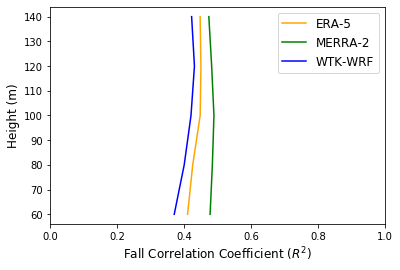

In [45]:
# Gordon CC SON

fig,ax=plt.subplots()

ax.plot(GordonR2SONERA,GordonZComp, label = 'ERA-5',color='orange')
ax.plot(GordonR2SONMERRA,GordonZComp,label='MERRA-2',color='green')
ax.plot(GordonR2SONWRF,GordonZComp,label='WTK-WRF',color='blue')

ax.legend(fontsize = 12)
ax.set_xlabel('Fall Correlation Coefficient ($R^2$)', fontsize = 12)
ax.set_ylabel('Height (m)', fontsize = 12)
ax.set_xlim([0,1])
# plt.savefig('GordonR2SON')
plt.show()

In [46]:
# Gordon cRMSE Total

GordonCRMSEERA=np.zeros(5)
GordonCRMSEERA[0]=(sm.centered_rms_dev(GordonWSnan['Lidar60'],GordonWSnan['ERA66.5']))
GordonCRMSEERA[1]=(sm.centered_rms_dev(GordonWSnan['Lidar80'],GordonWSnan['ERA79']))
GordonCRMSEERA[2]=(sm.centered_rms_dev(GordonWSnan['Lidar100'],GordonWSnan['ERA106']))
GordonCRMSEERA[3]=(sm.centered_rms_dev(GordonWSnan['Lidar120'],GordonWSnan['ERA121.5']))
GordonCRMSEERA[4]=(sm.centered_rms_dev(GordonWSnan['Lidar140'],GordonWSnan['ERA140']))

GordonCRMSEMERRA=np.zeros(5)
GordonCRMSEMERRA[0]=(sm.centered_rms_dev(GordonWSnan['Lidar60'],GordonWSnan['MERRA60']))
GordonCRMSEMERRA[1]=(sm.centered_rms_dev(GordonWSnan['Lidar80'],GordonWSnan['MERRA80']))
GordonCRMSEMERRA[2]=(sm.centered_rms_dev(GordonWSnan['Lidar100'],GordonWSnan['MERRA100']))
GordonCRMSEMERRA[3]=(sm.centered_rms_dev(GordonWSnan['Lidar120'],GordonWSnan['MERRA120']))
GordonCRMSEMERRA[4]=(sm.centered_rms_dev(GordonWSnan['Lidar140'],GordonWSnan['MERRA140']))

GordonCRMSEWRF=np.zeros(5)
GordonCRMSEWRF[0]=(sm.centered_rms_dev(GordonWSnan['Lidar60'],GordonWSnan['WRF60']))
GordonCRMSEWRF[1]=(sm.centered_rms_dev(GordonWSnan['Lidar80'],GordonWSnan['WRF80']))
GordonCRMSEWRF[2]=(sm.centered_rms_dev(GordonWSnan['Lidar100'],GordonWSnan['WRF100']))
GordonCRMSEWRF[3]=(sm.centered_rms_dev(GordonWSnan['Lidar120'],GordonWSnan['WRF120']))
GordonCRMSEWRF[4]=(sm.centered_rms_dev(GordonWSnan['Lidar140'],GordonWSnan['WRF140']))

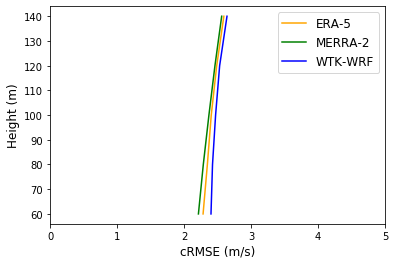

In [47]:
# Gordon cRMSE Total

fig,ax=plt.subplots()
ax.plot(GordonCRMSEERA,GordonZComp, label = 'ERA-5',color='orange')
ax.plot(GordonCRMSEMERRA,GordonZComp,label='MERRA-2',color='green')
ax.plot(GordonCRMSEWRF,GordonZComp,label='WTK-WRF',color='blue')

ax.legend(fontsize = 12)
ax.set_xlabel('cRMSE (m/s)', fontsize = 12)
ax.set_ylabel('Height (m)', fontsize = 12)
ax.set_xlim([0,5])
# plt.savefig('GordonCRMSETotal')
plt.show()

In [48]:
# Gordon cRMSE DJF

GordonCRMSEDJFERA=np.zeros(5)
GordonCRMSEDJFERA[0]=(sm.centered_rms_dev(GordonWSnanDJF['Lidar60'],GordonWSnanDJF['ERA66.5']))
GordonCRMSEDJFERA[1]=(sm.centered_rms_dev(GordonWSnanDJF['Lidar80'],GordonWSnanDJF['ERA79']))
GordonCRMSEDJFERA[2]=(sm.centered_rms_dev(GordonWSnanDJF['Lidar100'],GordonWSnanDJF['ERA106']))
GordonCRMSEDJFERA[3]=(sm.centered_rms_dev(GordonWSnanDJF['Lidar120'],GordonWSnanDJF['ERA121.5']))
GordonCRMSEDJFERA[4]=(sm.centered_rms_dev(GordonWSnanDJF['Lidar140'],GordonWSnanDJF['ERA140']))

GordonCRMSEDJFMERRA=np.zeros(5)
GordonCRMSEDJFMERRA[0]=(sm.centered_rms_dev(GordonWSnanDJF['Lidar60'],GordonWSnanDJF['MERRA60']))
GordonCRMSEDJFMERRA[1]=(sm.centered_rms_dev(GordonWSnanDJF['Lidar80'],GordonWSnanDJF['MERRA80']))
GordonCRMSEDJFMERRA[2]=(sm.centered_rms_dev(GordonWSnanDJF['Lidar100'],GordonWSnanDJF['MERRA100']))
GordonCRMSEDJFMERRA[3]=(sm.centered_rms_dev(GordonWSnanDJF['Lidar120'],GordonWSnanDJF['MERRA120']))
GordonCRMSEDJFMERRA[4]=(sm.centered_rms_dev(GordonWSnanDJF['Lidar140'],GordonWSnanDJF['MERRA140']))

GordonCRMSEDJFWRF=np.zeros(5)
GordonCRMSEDJFWRF[0]=(sm.centered_rms_dev(GordonWSnanDJF['Lidar60'],GordonWSnanDJF['WRF60']))
GordonCRMSEDJFWRF[1]=(sm.centered_rms_dev(GordonWSnanDJF['Lidar80'],GordonWSnanDJF['WRF80']))
GordonCRMSEDJFWRF[2]=(sm.centered_rms_dev(GordonWSnanDJF['Lidar100'],GordonWSnanDJF['WRF100']))
GordonCRMSEDJFWRF[3]=(sm.centered_rms_dev(GordonWSnanDJF['Lidar120'],GordonWSnanDJF['WRF120']))
GordonCRMSEDJFWRF[4]=(sm.centered_rms_dev(GordonWSnanDJF['Lidar140'],GordonWSnanDJF['WRF140']))

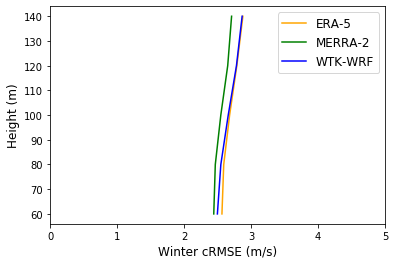

In [49]:
# Gordon cRMSE DJF

fig,ax=plt.subplots()
ax.plot(GordonCRMSEDJFERA,GordonZComp, label = 'ERA-5',color='orange')
ax.plot(GordonCRMSEDJFMERRA,GordonZComp,label='MERRA-2',color='green')
ax.plot(GordonCRMSEDJFWRF,GordonZComp,label='WTK-WRF',color='blue')

ax.legend(fontsize = 12)
ax.set_xlabel('Winter cRMSE (m/s)', fontsize = 12)
ax.set_ylabel('Height (m)', fontsize = 12)
ax.set_xlim([0,5])
# plt.savefig('GordonCRMSEDJF')
plt.show()

In [50]:
# Gordon cRMSE MAM

GordonCRMSEMAMERA=np.zeros(5)
GordonCRMSEMAMERA[0]=(sm.centered_rms_dev(GordonWSnanMAM['Lidar60'],GordonWSnanMAM['ERA66.5']))
GordonCRMSEMAMERA[1]=(sm.centered_rms_dev(GordonWSnanMAM['Lidar80'],GordonWSnanMAM['ERA79']))
GordonCRMSEMAMERA[2]=(sm.centered_rms_dev(GordonWSnanMAM['Lidar100'],GordonWSnanMAM['ERA106']))
GordonCRMSEMAMERA[3]=(sm.centered_rms_dev(GordonWSnanMAM['Lidar120'],GordonWSnanMAM['ERA121.5']))
GordonCRMSEMAMERA[4]=(sm.centered_rms_dev(GordonWSnanMAM['Lidar140'],GordonWSnanMAM['ERA140']))

GordonCRMSEMAMMERRA=np.zeros(5)
GordonCRMSEMAMMERRA[0]=(sm.centered_rms_dev(GordonWSnanMAM['Lidar60'],GordonWSnanMAM['MERRA60']))
GordonCRMSEMAMMERRA[1]=(sm.centered_rms_dev(GordonWSnanMAM['Lidar80'],GordonWSnanMAM['MERRA80']))
GordonCRMSEMAMMERRA[2]=(sm.centered_rms_dev(GordonWSnanMAM['Lidar100'],GordonWSnanMAM['MERRA100']))
GordonCRMSEMAMMERRA[3]=(sm.centered_rms_dev(GordonWSnanMAM['Lidar120'],GordonWSnanMAM['MERRA120']))
GordonCRMSEMAMMERRA[4]=(sm.centered_rms_dev(GordonWSnanMAM['Lidar140'],GordonWSnanMAM['MERRA140']))

GordonCRMSEMAMWRF=np.zeros(5)
GordonCRMSEMAMWRF[0]=(sm.centered_rms_dev(GordonWSnanMAM['Lidar60'],GordonWSnanMAM['WRF60']))
GordonCRMSEMAMWRF[1]=(sm.centered_rms_dev(GordonWSnanMAM['Lidar80'],GordonWSnanMAM['WRF80']))
GordonCRMSEMAMWRF[2]=(sm.centered_rms_dev(GordonWSnanMAM['Lidar100'],GordonWSnanMAM['WRF100']))
GordonCRMSEMAMWRF[3]=(sm.centered_rms_dev(GordonWSnanMAM['Lidar120'],GordonWSnanMAM['WRF120']))
GordonCRMSEMAMWRF[4]=(sm.centered_rms_dev(GordonWSnanMAM['Lidar140'],GordonWSnanMAM['WRF140']))

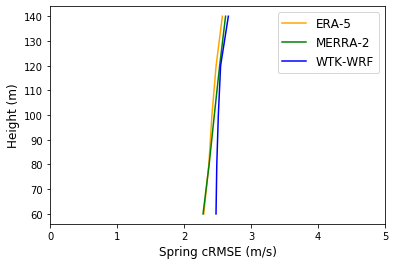

In [51]:
# Gordon cRMSE MAM

fig,ax=plt.subplots()
ax.plot(GordonCRMSEMAMERA,GordonZComp, label = 'ERA-5',color='orange')
ax.plot(GordonCRMSEMAMMERRA,GordonZComp,label='MERRA-2',color='green')
ax.plot(GordonCRMSEMAMWRF,GordonZComp,label='WTK-WRF',color='blue')

ax.legend(fontsize = 12)
ax.set_xlabel('Spring cRMSE (m/s)', fontsize = 12)
ax.set_ylabel('Height (m)', fontsize = 12)
ax.set_xlim([0,5])
# plt.savefig('GordonCRMSEMAM')
plt.show()

In [52]:
# Gordon cRMSE JJA

GordonCRMSEJJAERA=np.zeros(5)
GordonCRMSEJJAERA[0]=(sm.centered_rms_dev(GordonWSnanJJA['Lidar60'],GordonWSnanJJA['ERA66.5']))
GordonCRMSEJJAERA[1]=(sm.centered_rms_dev(GordonWSnanJJA['Lidar80'],GordonWSnanJJA['ERA79']))
GordonCRMSEJJAERA[2]=(sm.centered_rms_dev(GordonWSnanJJA['Lidar100'],GordonWSnanJJA['ERA106']))
GordonCRMSEJJAERA[3]=(sm.centered_rms_dev(GordonWSnanJJA['Lidar120'],GordonWSnanJJA['ERA121.5']))
GordonCRMSEJJAERA[4]=(sm.centered_rms_dev(GordonWSnanJJA['Lidar140'],GordonWSnanJJA['ERA140']))

GordonCRMSEJJAMERRA=np.zeros(5)
GordonCRMSEJJAMERRA[0]=(sm.centered_rms_dev(GordonWSnanJJA['Lidar60'],GordonWSnanJJA['MERRA60']))
GordonCRMSEJJAMERRA[1]=(sm.centered_rms_dev(GordonWSnanJJA['Lidar80'],GordonWSnanJJA['MERRA80']))
GordonCRMSEJJAMERRA[2]=(sm.centered_rms_dev(GordonWSnanJJA['Lidar100'],GordonWSnanJJA['MERRA100']))
GordonCRMSEJJAMERRA[3]=(sm.centered_rms_dev(GordonWSnanJJA['Lidar120'],GordonWSnanJJA['MERRA120']))
GordonCRMSEJJAMERRA[4]=(sm.centered_rms_dev(GordonWSnanJJA['Lidar140'],GordonWSnanJJA['MERRA140']))

GordonCRMSEJJAWRF=np.zeros(5)
GordonCRMSEJJAWRF[0]=(sm.centered_rms_dev(GordonWSnanJJA['Lidar60'],GordonWSnanJJA['WRF60']))
GordonCRMSEJJAWRF[1]=(sm.centered_rms_dev(GordonWSnanJJA['Lidar80'],GordonWSnanJJA['WRF80']))
GordonCRMSEJJAWRF[2]=(sm.centered_rms_dev(GordonWSnanJJA['Lidar100'],GordonWSnanJJA['WRF100']))
GordonCRMSEJJAWRF[3]=(sm.centered_rms_dev(GordonWSnanJJA['Lidar120'],GordonWSnanJJA['WRF120']))
GordonCRMSEJJAWRF[4]=(sm.centered_rms_dev(GordonWSnanJJA['Lidar140'],GordonWSnanJJA['WRF140']))

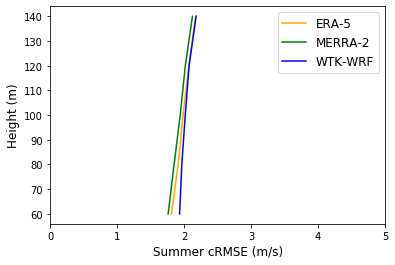

In [53]:
# Gordon cRMSE JJA

fig,ax=plt.subplots()
ax.plot(GordonCRMSEJJAERA,GordonZComp, label = 'ERA-5',color='orange')
ax.plot(GordonCRMSEJJAMERRA,GordonZComp,label='MERRA-2',color='green')
ax.plot(GordonCRMSEJJAWRF,GordonZComp,label='WTK-WRF',color='blue')

ax.legend(fontsize = 12)
ax.set_xlabel('Summer cRMSE (m/s)', fontsize = 12)
ax.set_ylabel('Height (m)', fontsize = 12)
ax.set_xlim([0,5])
# plt.savefig('GordonCRMSEJJA')
plt.show()

In [54]:
# Gordon cRMSE SON

GordonCRMSESONERA=np.zeros(5)
GordonCRMSESONERA[0]=(sm.centered_rms_dev(GordonWSnanSON['Lidar60'],GordonWSnanSON['ERA66.5']))
GordonCRMSESONERA[1]=(sm.centered_rms_dev(GordonWSnanSON['Lidar80'],GordonWSnanSON['ERA79']))
GordonCRMSESONERA[2]=(sm.centered_rms_dev(GordonWSnanSON['Lidar100'],GordonWSnanSON['ERA106']))
GordonCRMSESONERA[3]=(sm.centered_rms_dev(GordonWSnanSON['Lidar120'],GordonWSnanSON['ERA121.5']))
GordonCRMSESONERA[4]=(sm.centered_rms_dev(GordonWSnanSON['Lidar140'],GordonWSnanSON['ERA140']))

GordonCRMSESONMERRA=np.zeros(5)
GordonCRMSESONMERRA[0]=(sm.centered_rms_dev(GordonWSnanSON['Lidar60'],GordonWSnanSON['MERRA60']))
GordonCRMSESONMERRA[1]=(sm.centered_rms_dev(GordonWSnanSON['Lidar80'],GordonWSnanSON['MERRA80']))
GordonCRMSESONMERRA[2]=(sm.centered_rms_dev(GordonWSnanSON['Lidar100'],GordonWSnanSON['MERRA100']))
GordonCRMSESONMERRA[3]=(sm.centered_rms_dev(GordonWSnanSON['Lidar120'],GordonWSnanSON['MERRA120']))
GordonCRMSESONMERRA[4]=(sm.centered_rms_dev(GordonWSnanSON['Lidar140'],GordonWSnanSON['MERRA140']))

GordonCRMSESONWRF=np.zeros(5)
GordonCRMSESONWRF[0]=(sm.centered_rms_dev(GordonWSnanSON['Lidar60'],GordonWSnanSON['WRF60']))
GordonCRMSESONWRF[1]=(sm.centered_rms_dev(GordonWSnanSON['Lidar80'],GordonWSnanSON['WRF80']))
GordonCRMSESONWRF[2]=(sm.centered_rms_dev(GordonWSnanSON['Lidar100'],GordonWSnanSON['WRF100']))
GordonCRMSESONWRF[3]=(sm.centered_rms_dev(GordonWSnanSON['Lidar120'],GordonWSnanSON['WRF120']))
GordonCRMSESONWRF[4]=(sm.centered_rms_dev(GordonWSnanSON['Lidar140'],GordonWSnanSON['WRF140']))

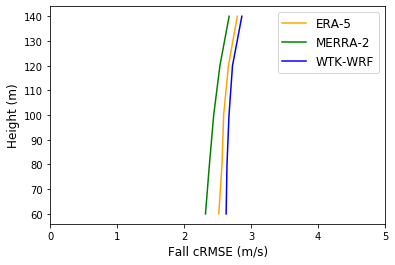

In [55]:
# Gordon cRMSE SON

fig,ax=plt.subplots()
ax.plot(GordonCRMSESONERA,GordonZComp, label = 'ERA-5',color='orange')
ax.plot(GordonCRMSESONMERRA,GordonZComp,label='MERRA-2',color='green')
ax.plot(GordonCRMSESONWRF,GordonZComp,label='WTK-WRF',color='blue')

ax.legend(fontsize = 12)
ax.set_xlabel('Fall cRMSE (m/s)', fontsize = 12)
ax.set_ylabel('Height (m)', fontsize = 12)
ax.set_xlim([0,5])
# plt.savefig('GordonCRMSESON')
plt.show()

In [56]:
# Gordon EMD Total

GordonEMDERA=np.zeros(5)
GordonEMDERA[0]=(wasserstein_distance(GordonWSnan['Lidar60'],GordonWSnan['ERA66.5']))
GordonEMDERA[1]=(wasserstein_distance(GordonWSnan['Lidar80'],GordonWSnan['ERA79']))
GordonEMDERA[2]=(wasserstein_distance(GordonWSnan['Lidar100'],GordonWSnan['ERA106']))
GordonEMDERA[3]=(wasserstein_distance(GordonWSnan['Lidar120'],GordonWSnan['ERA121.5']))
GordonEMDERA[4]=(wasserstein_distance(GordonWSnan['Lidar140'],GordonWSnan['ERA140']))

GordonEMDMERRA=np.zeros(5)
GordonEMDMERRA[0]=(wasserstein_distance(GordonWSnan['Lidar60'],GordonWSnan['MERRA60']))
GordonEMDMERRA[1]=(wasserstein_distance(GordonWSnan['Lidar80'],GordonWSnan['MERRA80']))
GordonEMDMERRA[2]=(wasserstein_distance(GordonWSnan['Lidar100'],GordonWSnan['MERRA100']))
GordonEMDMERRA[3]=(wasserstein_distance(GordonWSnan['Lidar120'],GordonWSnan['MERRA120']))
GordonEMDMERRA[4]=(wasserstein_distance(GordonWSnan['Lidar140'],GordonWSnan['MERRA140']))

GordonEMDWRF=np.zeros(5)
GordonEMDWRF[0]=(wasserstein_distance(GordonWSnan['Lidar60'],GordonWSnan['WRF60']))
GordonEMDWRF[1]=(wasserstein_distance(GordonWSnan['Lidar80'],GordonWSnan['WRF80']))
GordonEMDWRF[2]=(wasserstein_distance(GordonWSnan['Lidar100'],GordonWSnan['WRF100']))
GordonEMDWRF[3]=(wasserstein_distance(GordonWSnan['Lidar120'],GordonWSnan['WRF120']))
GordonEMDWRF[4]=(wasserstein_distance(GordonWSnan['Lidar140'],GordonWSnan['WRF140']))

(0, 5)

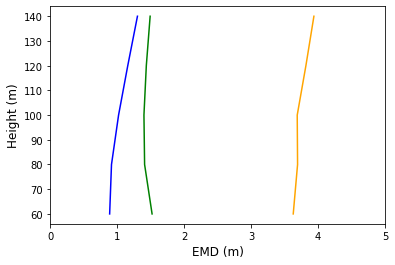

In [57]:
# Gordon EMD Total

fig,ax=plt.subplots()
ax.plot(GordonEMDERA,GordonZComp, label = 'ERA-5',color='orange')
ax.plot(GordonEMDMERRA,GordonZComp,label='MERRA-2',color='green')
ax.plot(GordonEMDWRF,GordonZComp,label='WTK-WRF',color='blue')

# ax.legend(fontsize = 12)
ax.set_xlabel('EMD (m)', fontsize = 12)
ax.set_ylabel('Height (m)', fontsize = 12)
ax.set_xlim([0,5])
# plt.savefig('GordonEMDTotal')

In [58]:
# Gordon EMD DJF

GordonEMDDJFERA=np.zeros(5)
GordonEMDDJFERA[0]=(wasserstein_distance(GordonWSnanDJF['Lidar60'],GordonWSnanDJF['ERA66.5']))
GordonEMDDJFERA[1]=(wasserstein_distance(GordonWSnanDJF['Lidar80'],GordonWSnanDJF['ERA79']))
GordonEMDDJFERA[2]=(wasserstein_distance(GordonWSnanDJF['Lidar100'],GordonWSnanDJF['ERA106']))
GordonEMDDJFERA[3]=(wasserstein_distance(GordonWSnanDJF['Lidar120'],GordonWSnanDJF['ERA121.5']))
GordonEMDDJFERA[4]=(wasserstein_distance(GordonWSnanDJF['Lidar140'],GordonWSnanDJF['ERA140']))

GordonEMDDJFMERRA=np.zeros(5)
GordonEMDDJFMERRA[0]=(wasserstein_distance(GordonWSnanDJF['Lidar60'],GordonWSnanDJF['MERRA60']))
GordonEMDDJFMERRA[1]=(wasserstein_distance(GordonWSnanDJF['Lidar80'],GordonWSnanDJF['MERRA80']))
GordonEMDDJFMERRA[2]=(wasserstein_distance(GordonWSnanDJF['Lidar100'],GordonWSnanDJF['MERRA100']))
GordonEMDDJFMERRA[3]=(wasserstein_distance(GordonWSnanDJF['Lidar120'],GordonWSnanDJF['MERRA120']))
GordonEMDDJFMERRA[4]=(wasserstein_distance(GordonWSnanDJF['Lidar140'],GordonWSnanDJF['MERRA140']))

GordonEMDDJFWRF=np.zeros(5)
GordonEMDDJFWRF[0]=(wasserstein_distance(GordonWSnanDJF['Lidar60'],GordonWSnanDJF['WRF60']))
GordonEMDDJFWRF[1]=(wasserstein_distance(GordonWSnanDJF['Lidar80'],GordonWSnanDJF['WRF80']))
GordonEMDDJFWRF[2]=(wasserstein_distance(GordonWSnanDJF['Lidar100'],GordonWSnanDJF['WRF100']))
GordonEMDDJFWRF[3]=(wasserstein_distance(GordonWSnanDJF['Lidar120'],GordonWSnanDJF['WRF120']))
GordonEMDDJFWRF[4]=(wasserstein_distance(GordonWSnanDJF['Lidar140'],GordonWSnanDJF['WRF140']))

(0, 5)

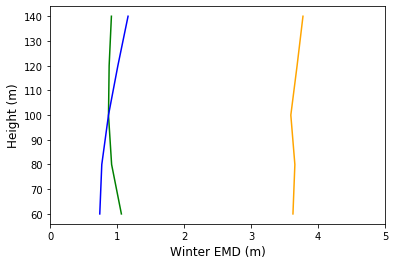

In [59]:
# Gordon EMD DJF 

fig,ax=plt.subplots()
ax.plot(GordonEMDDJFERA,GordonZComp, label = 'ERA-5',color='orange')
ax.plot(GordonEMDDJFMERRA,GordonZComp,label='MERRA-2',color='green')
ax.plot(GordonEMDDJFWRF,GordonZComp,label='WRF',color='blue')

# ax.legend(fontsize = 12)
ax.set_xlabel('Winter EMD (m)', fontsize = 12)
ax.set_ylabel('Height (m)', fontsize = 12)
ax.set_xlim([0,5])
# plt.savefig('GordonEMDDJF')

In [60]:
# Gordon EMD MAM

GordonEMDMAMERA=np.zeros(5)
GordonEMDMAMERA[0]=(wasserstein_distance(GordonWSnanMAM['Lidar60'],GordonWSnanMAM['ERA66.5']))
GordonEMDMAMERA[1]=(wasserstein_distance(GordonWSnanMAM['Lidar80'],GordonWSnanMAM['ERA79']))
GordonEMDMAMERA[2]=(wasserstein_distance(GordonWSnanMAM['Lidar100'],GordonWSnanMAM['ERA106']))
GordonEMDMAMERA[3]=(wasserstein_distance(GordonWSnanMAM['Lidar120'],GordonWSnanMAM['ERA121.5']))
GordonEMDMAMERA[4]=(wasserstein_distance(GordonWSnanMAM['Lidar140'],GordonWSnanMAM['ERA140']))

GordonEMDMAMMERRA=np.zeros(5)
GordonEMDMAMMERRA[0]=(wasserstein_distance(GordonWSnanMAM['Lidar60'],GordonWSnanMAM['MERRA60']))
GordonEMDMAMMERRA[1]=(wasserstein_distance(GordonWSnanMAM['Lidar80'],GordonWSnanMAM['MERRA80']))
GordonEMDMAMMERRA[2]=(wasserstein_distance(GordonWSnanMAM['Lidar100'],GordonWSnanMAM['MERRA100']))
GordonEMDMAMMERRA[3]=(wasserstein_distance(GordonWSnanMAM['Lidar120'],GordonWSnanMAM['MERRA120']))
GordonEMDMAMMERRA[4]=(wasserstein_distance(GordonWSnanMAM['Lidar140'],GordonWSnanMAM['MERRA140']))

GordonEMDMAMWRF=np.zeros(5)
GordonEMDMAMWRF[0]=(wasserstein_distance(GordonWSnanMAM['Lidar60'],GordonWSnanMAM['WRF60']))
GordonEMDMAMWRF[1]=(wasserstein_distance(GordonWSnanMAM['Lidar80'],GordonWSnanMAM['WRF80']))
GordonEMDMAMWRF[2]=(wasserstein_distance(GordonWSnanMAM['Lidar100'],GordonWSnanMAM['WRF100']))
GordonEMDMAMWRF[3]=(wasserstein_distance(GordonWSnanMAM['Lidar120'],GordonWSnanMAM['WRF120']))
GordonEMDMAMWRF[4]=(wasserstein_distance(GordonWSnanMAM['Lidar140'],GordonWSnanMAM['WRF140']))

(0, 5)

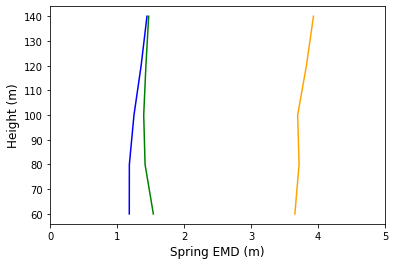

In [61]:
# Gordon EMD MAM 

fig,ax=plt.subplots()
ax.plot(GordonEMDMAMERA,GordonZComp, label = 'ERA-5',color='orange')
ax.plot(GordonEMDMAMMERRA,GordonZComp,label='MERRA-2',color='green')
ax.plot(GordonEMDMAMWRF,GordonZComp,label='WRF',color='blue')

# ax.legend(fontsize = 12)
ax.set_xlabel('Spring EMD (m)', fontsize = 12)
ax.set_ylabel('Height (m)', fontsize = 12)
ax.set_xlim([0,5])
# plt.savefig('GordonEMDMAM')

In [62]:
# Gordon EMD JJA

GordonEMDJJAERA=np.zeros(5)
GordonEMDJJAERA[0]=(wasserstein_distance(GordonWSnanJJA['Lidar60'],GordonWSnanJJA['ERA66.5']))
GordonEMDJJAERA[1]=(wasserstein_distance(GordonWSnanJJA['Lidar80'],GordonWSnanJJA['ERA79']))
GordonEMDJJAERA[2]=(wasserstein_distance(GordonWSnanJJA['Lidar100'],GordonWSnanJJA['ERA106']))
GordonEMDJJAERA[3]=(wasserstein_distance(GordonWSnanJJA['Lidar120'],GordonWSnanJJA['ERA121.5']))
GordonEMDJJAERA[4]=(wasserstein_distance(GordonWSnanJJA['Lidar140'],GordonWSnanJJA['ERA140']))

GordonEMDJJAMERRA=np.zeros(5)
GordonEMDJJAMERRA[0]=(wasserstein_distance(GordonWSnanJJA['Lidar60'],GordonWSnanJJA['MERRA60']))
GordonEMDJJAMERRA[1]=(wasserstein_distance(GordonWSnanJJA['Lidar80'],GordonWSnanJJA['MERRA80']))
GordonEMDJJAMERRA[2]=(wasserstein_distance(GordonWSnanJJA['Lidar100'],GordonWSnanJJA['MERRA100']))
GordonEMDJJAMERRA[3]=(wasserstein_distance(GordonWSnanJJA['Lidar120'],GordonWSnanJJA['MERRA120']))
GordonEMDJJAMERRA[4]=(wasserstein_distance(GordonWSnanJJA['Lidar140'],GordonWSnanJJA['MERRA140']))

GordonEMDJJAWRF=np.zeros(5)
GordonEMDJJAWRF[0]=(wasserstein_distance(GordonWSnanJJA['Lidar60'],GordonWSnanJJA['WRF60']))
GordonEMDJJAWRF[1]=(wasserstein_distance(GordonWSnanJJA['Lidar80'],GordonWSnanJJA['WRF80']))
GordonEMDJJAWRF[2]=(wasserstein_distance(GordonWSnanJJA['Lidar100'],GordonWSnanJJA['WRF100']))
GordonEMDJJAWRF[3]=(wasserstein_distance(GordonWSnanJJA['Lidar120'],GordonWSnanJJA['WRF120']))
GordonEMDJJAWRF[4]=(wasserstein_distance(GordonWSnanJJA['Lidar140'],GordonWSnanJJA['WRF140']))

(0, 5)

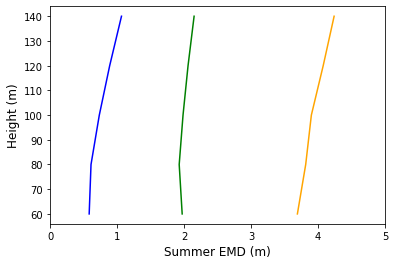

In [63]:
# Gordon EMD JJA 

fig,ax=plt.subplots()
ax.plot(GordonEMDJJAERA,GordonZComp, label = 'ERA-5',color='orange')
ax.plot(GordonEMDJJAMERRA,GordonZComp,label='MERRA-2',color='green')
ax.plot(GordonEMDJJAWRF,GordonZComp,label='WRF',color='blue')

# ax.legend(fontsize = 12)
ax.set_xlabel('Summer EMD (m)', fontsize = 12)
ax.set_ylabel('Height (m)', fontsize = 12)
ax.set_xlim([0,5])
# plt.savefig('GordonEMDJJA')

In [64]:
# Gordon EMD SON

GordonEMDSONERA=np.zeros(5)
GordonEMDSONERA[0]=(wasserstein_distance(GordonWSnanSON['Lidar60'],GordonWSnanSON['ERA66.5']))
GordonEMDSONERA[1]=(wasserstein_distance(GordonWSnanSON['Lidar80'],GordonWSnanSON['ERA79']))
GordonEMDSONERA[2]=(wasserstein_distance(GordonWSnanSON['Lidar100'],GordonWSnanSON['ERA106']))
GordonEMDSONERA[3]=(wasserstein_distance(GordonWSnanSON['Lidar120'],GordonWSnanSON['ERA121.5']))
GordonEMDSONERA[4]=(wasserstein_distance(GordonWSnanSON['Lidar140'],GordonWSnanSON['ERA140']))

GordonEMDSONMERRA=np.zeros(5)
GordonEMDSONMERRA[0]=(wasserstein_distance(GordonWSnanSON['Lidar60'],GordonWSnanSON['MERRA60']))
GordonEMDSONMERRA[1]=(wasserstein_distance(GordonWSnanSON['Lidar80'],GordonWSnanSON['MERRA80']))
GordonEMDSONMERRA[2]=(wasserstein_distance(GordonWSnanSON['Lidar100'],GordonWSnanSON['MERRA100']))
GordonEMDSONMERRA[3]=(wasserstein_distance(GordonWSnanSON['Lidar120'],GordonWSnanSON['MERRA120']))
GordonEMDSONMERRA[4]=(wasserstein_distance(GordonWSnanSON['Lidar140'],GordonWSnanSON['MERRA140']))

GordonEMDSONWRF=np.zeros(5)
GordonEMDSONWRF[0]=(wasserstein_distance(GordonWSnanSON['Lidar60'],GordonWSnanSON['WRF60']))
GordonEMDSONWRF[1]=(wasserstein_distance(GordonWSnanSON['Lidar80'],GordonWSnanSON['WRF80']))
GordonEMDSONWRF[2]=(wasserstein_distance(GordonWSnanSON['Lidar100'],GordonWSnanSON['WRF100']))
GordonEMDSONWRF[3]=(wasserstein_distance(GordonWSnanSON['Lidar120'],GordonWSnanSON['WRF120']))
GordonEMDSONWRF[4]=(wasserstein_distance(GordonWSnanSON['Lidar140'],GordonWSnanSON['WRF140']))

(0, 5)

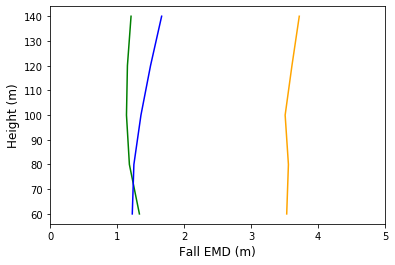

In [65]:
# Gordon EMD SON 

fig,ax=plt.subplots()
ax.plot(GordonEMDSONERA,GordonZComp, label = 'ERA-5',color='orange')
ax.plot(GordonEMDSONMERRA,GordonZComp,label='MERRA-2',color='green')
ax.plot(GordonEMDSONWRF,GordonZComp,label='WRF',color='blue')

# ax.legend(fontsize = 12)
ax.set_xlabel('Fall EMD (m)', fontsize = 12)
ax.set_ylabel('Height (m)', fontsize = 12)
ax.set_xlim([0,5])
# plt.savefig('GordonEMDSON')